In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [4]:
data = {
    "intents": [
        {
            "intent": "course",
            "text": [
                "list of courses",
                "list of courses offered",
                "list of courses offered in",
                "Can you provide a list of academic programs?",
                "Which courses can I study at your institution?",
                "Tell me about the different departments in your university.",
                "What are the specialization options at your college?",
                "Are there any unique courses offered at your university?",
                "Which engineering disciplines are available for study?",
                "Can you share information about the computer science courses?",
                "What programming languages are covered in the computer engineering curriculum?",
                "Tell me about the courses related to artificial intelligence and machine learning.",
                "Are there any interdisciplinary courses offered?",
                "Which courses focus on information technology and systems?",
                "Can you provide details about the electrical engineering program?",
                "What are the core subjects in mechanical engineering?",
                "Are there any research-oriented courses available?",
                "Tell me about the courses in environmental engineering.",
                "What are the prerequisites for computer engineering?",
                "Can you provide an overview of the civil engineering curriculum?",
                "Are there any hands-on practical courses in chemical engineering?",
                "Tell me about the faculty expertise in the computer science department.",
                "Are there any business-related courses offered alongside technical programs?",
                "What minors are available for students to choose from?",
                "Can you share information about the courses related to robotics?",
                "Are there any industry partnerships for specific courses?",
                "What is the curriculum structure for the computer engineering program?",
                "Tell me about the capstone projects for engineering students.",
                "What courses are recommended for students interested in data science?",
                "Can you provide details about the software engineering program?",
                "Are there any exchange programs with other universities for specific courses?",
                "Tell me about the internship opportunities associated with engineering programs.",
                "What courses focus on sustainable energy and environmental engineering?",
                "Are there any joint degree programs with other institutions?",
                "Can you share information about the aerospace engineering courses?",
                "What are the elective options for students in the computer science department?",
                "Tell me about the courses that involve hands-on lab work.",
                "Are there any courses related to cybersecurity in the information technology program?",
                "Can you provide details about the chemical process engineering curriculum?",
                "What courses prepare students for careers in artificial intelligence?",
                "Are there any study abroad opportunities for engineering students?",
                "Tell me about the courses that incorporate the latest technology trends.",
                "What are the core subjects in the civil engineering program?",
                "Can you share information about the networking courses in the IT program?",
                "Are there any courses that focus on virtual reality and augmented reality?",
                "What courses are available for students interested in biomedical engineering?",
                "Tell me about the courses that focus on renewable energy sources.",
                "Are there any courses that explore the intersection of technology and ethics?",
                "Can you provide details about the material science and engineering program?",
                "What courses are recommended for students interested in artificial intelligence?",
                "Are there any courses that involve fieldwork in environmental engineering?",
                "Tell me about the courses that integrate entrepreneurship principles.",
                "What are the core subjects in the electrical engineering curriculum?",
                "Can you share information about the courses related to data analytics?",
                "Are there any courses that involve collaboration with research institutions?",
                "What courses are available for students interested in computer graphics?",
                "Tell me about the courses that focus on sustainable architecture.",
                "Are there any courses related to the Internet of Things (IoT)?",
                "Can you provide details about the courses in software development?",
                "What courses are recommended for students interested in machine learning?",
                "Are there any courses that involve participation in hackathons or coding competitions?",
                "Tell me about the courses that explore the intersection of technology and business.",
                "What are the core subjects in the chemical engineering program?",
                "Can you share information about the courses related to computer networks?",
                "Are there any courses that focus on virtual reality and augmented reality?",
                "What courses are available for students interested in mechatronics?",
                "Tell me about the courses that involve community service or social impact projects.",
                "Are there any courses that prepare students for careers in game development?",
                "Can you provide details about the courses in biomedical engineering?",
                "Tell me about the courses that focus on smart cities and urban planning.",
                "What are the entry requirements for the computer science program?",
                "Can you tell me about the faculty-to-student ratio in the engineering department?",
                "Are there any scholarships available specifically for students enrolled in engineering courses?",
                "What are the prerequisites for enrolling in the biomedical engineering program?",
                "Can you provide information about the faculty members teaching in the physics department?",
                "Are there any joint research opportunities available for students studying chemistry?",
                "What kind of projects do students typically work on in the architecture program?",
                "Can you provide details about the accreditation status of the mathematics courses?",
                "What study abroad options are available for students in the geography department?",
                "Are there any language requirements for international students applying to the linguistics program?",
                "Can you tell me about the industry partnerships for students studying economics?",
                "What career services are available for graduates of the sociology program?",
                "Are there any opportunities for interdisciplinary study between anthropology and other fields?",
                "What research facilities are available for students in the archaeology department?",
                "Can you provide information about the internship opportunities for political science majors?",
                "What specializations are available within the history program?",
                "Are there any courses focused on African literature in the English department?",
                "Can you tell me about the guest lecturers who visit the philosophy department?",
                "What are the options for students interested in pursuing a double major in psychology?",
                "Are there any courses specifically tailored for students interested in African studies?",
                "Can you provide details about the study abroad programs for students in the foreign languages department?",
                "What kind of support is available for students with disabilities in the sociology program?",
                "Are there any opportunities for student-led research in the anthropology department?",
                "What career paths do graduates of the geography program typically pursue?",
                "Can you tell me about the faculty members specializing in international relations?",
                "What internship opportunities are available for students studying economics?",
                "Are there any courses focused on sustainable development in the environmental science program?",
                "Can you provide information about the graduate school placement rate for history majors?",
                "What are the options for students interested in studying African art in the art history department?",
                "Are there any research grants available for students in the sociology department?",
                "Can you tell me about the partnerships between the geography department and local government agencies?",
                "What are the options for students interested in pursuing a career in urban planning?",
                "Are there any opportunities for students to publish their research in the anthropology department?",
                "Can you provide details about the study abroad programs for students in the foreign languages department?",
                "What kind of internships do political science majors typically undertake?",
                "Are there any courses focused on contemporary African literature in the English department?",
                "Can you tell me about the faculty members who specialize in feminist philosophy?",
                "What career services are available for graduates of the psychology program?",
                "Are there any opportunities for students to study abroad in Francophone countries?",
                "Can you provide information about the research opportunities for students in the sociology department?",
                "What are the options for students interested in pursuing a career in cultural resource management?",
                "Are there any partnerships between the anthropology department and local museums?",
                "Can you tell me about the faculty members specializing in postcolonial literature?",
                "What internship opportunities are available for students studying international relations?",
                "Are there any courses focused on sustainable agriculture in the geography department?",
                "Can you provide details about the graduate school placement rate for economics majors?",
                "What are the options for students interested in studying African cinema in the film studies department?",
                "Are there any research grants available for students in the history department?",
                "Can you tell me about the partnerships between the sociology department and community organizations?",
                "What are the options for students interested in pursuing a career in environmental policy?",
                "Are there any opportunities for students to participate in archaeological fieldwork?",
                "Can you provide information about the study abroad programs for students in the foreign languages department?",
                "What kind of internships do political science majors typically undertake?",
                "Are there any courses focused on contemporary African literature in the English department?",
                "Can you tell me about the faculty members who specialize in feminist philosophy?",
                "What career services are available for graduates of the psychology program?",
                "Are there any opportunities for students to study abroad in Francophone countries?",
                "Can you provide information about the research opportunities for students in the sociology department?",
                "What are the options for students interested in pursuing a career in cultural resource management?",
                "Are there any partnerships between the anthropology department and local museums?",
                "Can you tell me about the faculty members specializing in postcolonial literature?",
                "What internship opportunities are available for students studying international relations?",
                "Are there any courses focused on sustainable agriculture in the geography department?",
                "Can you provide details about the graduate school placement rate for economics majors?",
                "What are the options for students interested in studying African cinema in the film studies department?",
                "Are there any research grants available for students in the history department?",
                "Can you tell me about the partnerships between the sociology department and community organizations?",
                "What are the options for students interested in pursuing a career in environmental policy?",
                "Are there any opportunities for students to participate in archaeological fieldwork?",
                "Can you provide information about the study abroad programs for students in the foreign languages department?",
                "What kind of internships do political science majors typically undertake?",
                "Are there any courses focused on contemporary African literature in the English department?",
                "Can you tell me about the faculty members who specialize in feminist philosophy?",
                "What career services are available for graduates of the psychology program?",
                "Are there any opportunities for students to study abroad in Francophone countries?",
                "Can you provide information about the research opportunities for students in the sociology department?",
                "What are the options for students interested in pursuing a career in cultural resource management?",
                "Are there any partnerships between the anthropology department and local museums?",
                "Can you tell me about the faculty members specializing in postcolonial literature?",
                "What internship opportunities are available for students studying international relations?",
                "Are there any courses focused on sustainable agriculture in the geography department?",
                "Can you provide details about the graduate school placement rate for economics majors?",
                "What are the options for students interested in studying African cinema in the film studies department?",
                "Are there any research grants available for students in the history department?",
                "Can you tell me about the partnerships between the sociology department and community organizations?",
                "What are the options for students interested in pursuing a career in environmental policy?",
                "Are there any opportunities for students to participate in archaeological fieldwork?",
                "Can you provide information about the study abroad programs for students in the foreign languages department?",
                "What kind of internships do political science majors typically undertake?",
                "Are there any courses focused on contemporary African literature",
                "Can you provide information on the admission requirements for specific courses at the University of Ibadan?",
                "What are the prerequisites for enrolling in the computer science program at the University of Ibadan?",
                "Are there any certificate programs available alongside degree courses at the University of Ibadan?",
                "Can you tell me about the faculty-to-student ratio in the engineering departments at the University of Ibadan?",
                "Are there any accelerated degree programs offered at the University of Ibadan?",
                "Can students customize their degree programs with elective courses at the University of Ibadan?",
                "What are the options for double majoring or minoring in different fields at the University of Ibadan?",
                "Are there any honors programs available for high-achieving students at the University of Ibadan?",
                "Can you provide details about the co-op programs or internships available for engineering students at the University of Ibadan?",
                "Are there any courses specifically tailored for students interested in entrepreneurship at the University of Ibadan?",
                "What are the language requirements for international students enrolling in courses at the University of Ibadan?",
                "Can students pursue interdisciplinary studies combining courses from different departments at the University of Ibadan?",
                "Are there any distance learning or online courses available at the University of Ibadan?",
                "What types of hands-on learning experiences are incorporated into the curriculum at the University of Ibadan?",
                "Can students conduct research projects or independent studies as part of their coursework at the University of Ibadan?",
                "Are there any study abroad opportunities linked to specific courses at the University of Ibadan?",
                "Can you provide information on the facilities and resources available for students enrolled in engineering courses at the University of Ibadan?",
                "What are the options for graduate studies or advanced degrees in engineering at the University of Ibadan?",
                "Are there any scholarships or financial aid specifically designated for students pursuing certain courses at the University of Ibadan?",
                "Can you provide information on the accreditation status of courses and programs at the University of Ibadan?",
                "What are the research opportunities for undergraduate students in engineering at the University of Ibadan?",
                "Are there any study groups or tutoring services available to support students in challenging courses at the University of Ibadan?",
                "Can students switch majors or transfer credits easily between departments at the University of Ibadan?",
                "What are the options for pursuing a minor alongside a major course of study at the University of Ibadan?",
                "Are there any specialized facilities or labs dedicated to specific courses at the University of Ibadan?",
                "Can students access career counseling or guidance services related to their chosen courses at the University of Ibadan?",
                "What are the employment outcomes or career paths for graduates of specific courses at the University of Ibadan?",
                "Are there any opportunities for international collaboration or exchange programs related to certain courses at the University of Ibadan?",
                "Can students participate in competitions or conferences related to their courses at the University of Ibadan?",
                "What are the options for continuing education or professional development in specific fields at the University of Ibadan?",
                "Are there any community outreach or service-learning components integrated into courses at the University of Ibadan?",
                "Can students pursue a joint degree program combining courses from different disciplines at the University of Ibadan?",
                "What are the options for accelerated or advanced placement courses for incoming students at the University of Ibadan?",
                "Are there any honors societies or academic clubs affiliated with specific courses at the University of Ibadan?",
                "Can students access tutoring or academic support services for courses they find challenging at the University of Ibadan?",
                "What are the options for students interested in pursuing a career in academia after completing their courses at the University of Ibadan?",
                "Can you provide information on the alumni network for specific courses at the University of Ibadan?",
                "Are there any opportunities for interdisciplinary research projects or collaborations between departments at the University of Ibadan?",
                "What are the options for students interested in pursuing graduate studies abroad after completing their courses at the University of Ibadan?",
                "Can students gain practical experience through internships or co-op placements related to their courses at the University of Ibadan?",
                "What are the options for students interested in studying abroad for a semester or year as part of their courses at the University of Ibadan?",
                "Are there any industry partnerships or collaborations that offer practical experience opportunities for students in specific courses at the University of Ibadan?",
                "Can students pursue research projects or thesis work as part of their courses at the University of Ibadan?",
                "What are the options for students interested in pursuing a career in government or public service after completing their courses at the University of Ibadan?",
                "Are there any specialized tracks or concentrations within certain courses at the University of Ibadan?",
                "Can students access career fairs or networking events related to their courses at the University of Ibadan?",
                "What are the options for students interested in pursuing a career in the nonprofit sector after completing their courses at the University of Ibadan?",
                "Are there any opportunities for students to publish their research or academic work in journals or conferences related to their courses at the University of Ibadan?",
                "Can students participate in study tours or field trips as part of their courses at the University of Ibadan?",
                "What are the options for students interested in pursuing a career in consulting or business after completing their courses at the University of Ibadan?",
                "Are there any options for students to pursue interdisciplinary minors alongside their major courses at the University of Ibadan?",
                "Can students access mentorship or guidance from alumni working in their field of interest at the University of Ibadan?",
                "What are the options for students interested in pursuing a career in healthcare or medicine after completing their courses at the University of Ibadan?",
                "Are there any options for students to participate in research assistantships or teaching assistantships related to their courses at the University of Ibadan?",
                "Can students participate in study abroad programs that are specifically tailored to their courses at the University of Ibadan?",
                "What are the options for students interested in pursuing a career in journalism or media after completing their courses at the University of Ibadan?",
                "Are there any options for students to pursue internships or volunteer opportunities abroad as part of their courses at the University of Ibadan?",
                "Can students participate in co-curricular activities or clubs related to their courses at the University of Ibadan?",
                "What are the options for students interested in pursuing a career in technology or startups after completing their courses at the University of Ibadan?",
                "Are there any options for students to pursue research projects or independent studies abroad as part of their courses at the University of Ibadan?",
                "Can students access funding or grants to support their research or academic projects related to their courses at",
                "What are the options for students interested in pursuing careers in the arts or creative industries after completing their courses at the University of Ibadan?",
                "Are there any options for students to participate in international conferences or symposiums related to their courses at the University of Ibadan?",
                "Can students collaborate with faculty members on research projects or publications related to their courses at the University of Ibadan?",
                "What are the options for students interested in pursuing careers in the nonprofit sector after completing their courses at the University of Ibadan?",
                "Are there any options for students to participate in cultural exchange programs as part of their courses at the University of Ibadan?",
                "Can students access resources or support for starting their own businesses related to their courses at the University of Ibadan?",
                "What are the options for students interested in pursuing careers in government or public policy after completing their courses at the University of Ibadan?",
                "Are there any options for students to pursue internships or experiential learning opportunities in international organizations as part of their courses at the University of Ibadan?",
                "Can students collaborate with industry professionals on projects or initiatives related to their courses at the University of Ibadan?",
                "What are the options for students interested in pursuing careers in social justice or advocacy after completing their courses at the University of Ibadan?",
                "Are there any options for students to participate in exchange programs with universities in other countries as part of their courses at the University of Ibadan?",
                "Can students access resources or support for pursuing graduate studies or professional certifications related to their courses at the University of Ibadan?",
                "What are the options for students interested in pursuing careers in environmental sustainability or conservation after completing their courses at the University of Ibadan?",
                "Are there any options for students to participate in research collaborations with institutions or organizations abroad as part of their courses at the University of Ibadan?",
                "Can students participate in interdisciplinary research projects or initiatives related to their courses at the University of Ibadan?",
                "What are the options for students interested in pursuing careers in international development or humanitarian aid after completing their courses at the University of Ibadan?",
                "Are there any options for students to pursue internships or cooperative education experiences in industries abroad as part of their courses at the University of Ibadan?",
                "Can students access resources or support for pursuing patents or intellectual property related to their courses at the University of Ibadan?",
                "What are the options for students interested in pursuing careers in diplomacy or international relations after completing their courses at the University of Ibadan?",
                "Are there any options for students to participate in global health initiatives or projects as part of their courses at the University of Ibadan?",
                "Can students collaborate with local communities or NGOs on development projects related to their courses at the University of Ibadan?",
                "What are the options for students interested in pursuing careers in education or teaching after completing their courses at the University of Ibadan?",
                "Are there any options for students to participate in research expeditions or fieldwork abroad as part of their courses at the University of Ibadan?",
                "Can students access resources or support for starting their own social enterprises related to their courses at the University of Ibadan?",
                "What are the options for students interested in pursuing careers in diplomacy or international affairs after completing their courses at the University of Ibadan?",
                "Are there any options for students to participate in study tours or cultural immersion experiences abroad as part of their courses at the University of Ibadan?",
                "Can students collaborate with local businesses or industries on projects or internships related to their courses at the University of Ibadan?",
                "What are the options for students interested in pursuing careers in sustainable development or renewable energy after completing their courses at the University of Ibadan?",
                "Are there any options for students to participate in global entrepreneurship competitions or incubators as part of their courses at the University of Ibadan?",
                "Can students access resources or support for pursuing fellowships or grants for international research or projects related to their courses at the University of Ibadan?",
                "What are the options for students interested in pursuing careers in cultural preservation or heritage management after completing their courses at the University of Ibadan?",
                "Are there any options for students to participate in humanitarian relief efforts or disaster response initiatives abroad as part of their courses at the University of Ibadan?",
                "Can students collaborate with international organizations or NGOs on research projects or initiatives related to their courses at the University of Ibadan?",
                "What are the options for students interested in pursuing careers in urban planning or sustainable architecture after completing their courses at the University of Ibadan?",
                "Are there any options for students to participate in diplomatic simulations or Model United Nations conferences as part of their courses at the University of Ibadan?",
                "Can students access resources or support for pursuing language immersion programs or study abroad experiences related to their courses at the University of Ibadan?",
                "What are the options for students interested in pursuing careers in international business or trade after completing their courses at the University of Ibadan?",
                "Are there any options for students to participate in archaeological digs or cultural heritage projects abroad as part of their courses at the University of Ibadan?",
                "Can students collaborate with indigenous communities or local organizations on research or development projects related to their courses at the University of Ibadan?",
                "What are the options for students interested in pursuing careers in global journalism or media after completing their courses at the University of Ibadan?",
                "Are there any options for students to participate in peacebuilding or conflict resolution initiatives abroad as part of their courses at the University of Ibadan?",
                "Can students access resources or support for pursuing internships or fellowships at international organizations or embassies related to their courses at the University of Ibadan?",
                "What are the options for students interested in pursuing careers in international law or human rights after completing their courses at the University of Ibadan?",
                "Are there any options for students to participate in cultural exchange programs or language immersion experiences abroad as part of their courses at the University of Ibadan?",
                "Can students collaborate with diaspora communities or global networks on research projects or initiatives related to their courses at the University of Ibadan?",
                "What are the options for students interested in pursuing careers in global health or epidemiology after completing their courses at the University of Ibadan?",
                "Are there any options for students to participate in entrepreneurship boot camps or startup accelerators as part of their courses at the University of Ibadan?",
                "Can students access resources or support for pursuing internships or research opportunities at international NGOs or think tanks related to their courses at the University of Ibadan?",
                "What are the options for students interested in pursuing careers in international development or sustainable agriculture after completing their courses at the University of Ibadan?",
                "Are there any options for students to participate in global leadership programs or conferences as part of their courses at the University of Ibadan?",
                "Can students collaborate with global health organizations or research institutes on projects or internships related to their courses at the University",
                "What are the options for students interested in pursuing careers in global finance or economics after completing their courses at the University of Ibadan?",
                "Are there any options for students to participate in cross-cultural communication workshops or seminars as part of their courses at the University of Ibadan?",
                "Can students access resources or support for pursuing internships or research opportunities at international financial institutions related to their courses at the University of Ibadan?",
                "What are the options for students interested in pursuing careers in international marketing or branding after completing their courses at the University of Ibadan?",
                "Are there any options for students to participate in global supply chain management projects or internships as part of their courses at the University of Ibadan?",
                "Can students collaborate with multinational corporations or consulting firms on projects or case studies related to their courses at the University of Ibadan?",
                "What are the options for students interested in pursuing careers in international relations or diplomacy after completing their courses at the University of Ibadan?",
                "Are there any options for students to participate in cross-cultural leadership training or exchanges as part of their courses at the University of Ibadan?",
                "Can students access resources or support for pursuing internships or research opportunities at international law firms related to their courses at the University of Ibadan?",
                "What are the options for students interested in pursuing careers in global entrepreneurship or innovation after completing their courses at the University of Ibadan?",
                "Are there any options for students to participate in global health policy forums or conferences as part of their courses at the University of Ibadan?",
                "Can students collaborate with international development organizations or NGOs on projects or internships related to their courses at the University of Ibadan?",
                "What are the options for students interested in pursuing careers in sustainable development or environmental conservation after completing their courses at the University of Ibadan?",
                "Are there any options for students to participate in cross-border trade negotiations or simulations as part of their courses at the University of Ibadan?",
                "Can students access resources or support for pursuing internships or research opportunities at international environmental agencies related to their courses at the University of Ibadan?",
                "What are the options for students interested in pursuing careers in international education or exchange programs after completing their courses at the University of Ibadan?",
                "Are there any options for students to participate in cross-cultural research projects or exchanges as part of their courses at the University of Ibadan?",
                "Can students collaborate with international NGOs or humanitarian organizations on projects or internships related to their courses at the University of Ibadan?",
                "What are the options for students interested in pursuing careers in global media or communications after completing their courses at the University of Ibadan?",
                "Are there any options for students to participate in global leadership development programs or workshops as part of their courses at the University of Ibadan?",
                "Can students access resources or support for pursuing internships or research opportunities at international media outlets related to their courses at the University of Ibadan?",
                "What are the options for students interested in pursuing careers in international human rights advocacy or law after completing their courses at the University of Ibadan?",
                "Are there any options for students to participate in cross-cultural exchange programs or immersion experiences as part of their courses at the University of Ibadan?",
                "Can students collaborate with international advocacy groups or legal firms on projects or internships related to their courses at the University of Ibadan?",
                "What are the options for students interested in pursuing careers in global public health or epidemiology after completing their courses at the University of Ibadan?",
                "Are there any options for students to participate in global health research projects or fieldwork as part of their courses at the University of Ibadan?",
                "Can students access resources or support for pursuing internships or research opportunities at international public health organizations related to their courses at the University of Ibadan?",
                "What are the options for students interested in pursuing careers in international business development or market analysis after completing their courses at the University of Ibadan?",
                "Are there any options for students to participate in cross-cultural business negotiations or market research projects as part of their courses at the University of Ibadan?",
                "Can students access resources or support for pursuing internships or research opportunities at international corporations related to their courses at the University of Ibadan?",
                "What are the options for students interested in pursuing careers in global entrepreneurship or startups after completing their courses at the University of Ibadan?",
                "Are there any options for students to participate in cross-border entrepreneurship competitions or incubators as part of their courses at the University of Ibadan?",
                "Can students access resources or support for starting their own businesses with an international focus related to their courses at the University of Ibadan?",
                "What are the options for students interested in pursuing careers in international finance or investment banking after completing their courses at the University of Ibadan?",
                "Are there any options for students to participate in cross-border investment projects or financial simulations as part of their courses at the University of Ibadan?",
                "Can students access resources or support for pursuing internships or research opportunities at international financial institutions related to their courses at the University of Ibadan?",
                "What are the options for students interested in pursuing careers in global marketing or brand management after completing their courses at the University of Ibadan?",
                "Are there any options for students to participate in cross-cultural marketing campaigns or market entry strategies as part of their courses at the University of Ibadan?",
                "Can students access resources or support for pursuing internships or research opportunities at international marketing agencies related to their courses at the University of Ibadan?",
                "What are the options for students interested in pursuing careers in international trade or supply chain management after completing their courses at the University of Ibadan?",
                "Are there any options for students to participate in cross-border logistics projects or supply chain optimization as part of their courses at the University of Ibadan?",
                "Can students access resources or support for pursuing internships or research opportunities at international trade organizations related to their courses at the University of Ibadan?",
                "What are the options for students interested in pursuing careers in global consulting or management after completing their courses at the University of Ibadan?",
                "Are there any options for students to participate in cross-cultural consulting projects or organizational development as part of their courses at the University of Ibadan?",
                "Can students access resources or support for pursuing internships or research opportunities at international consulting firms related to their courses at the University of Ibadan?",
                "What are the options for students interested in pursuing careers in international law or legal advocacy after completing their courses at the University of Ibadan?",
                "Are there any options for students to participate in cross-border legal research projects or advocacy campaigns as part of their courses at the University of Ibadan?",
                "Can students access resources or support for pursuing internships or research opportunities at international law firms related to their courses at the University of Ibadan?",
                "What are the options for students interested in pursuing careers in global education or teaching after completing their courses at the University of Ibadan?",
                "Are there any options for students to participate in cross-cultural teaching internships or exchange programs as part of their courses at the University of Ibadan?",
                "Can students access resources or support for pursuing teaching opportunities abroad related to their courses at the University of Ibadan?",
                "What are the options for students interested in pursuing careers in international development or humanitarian aid after completing their courses at the University of Ibadan?",
                "Are there any options for students to participate in cross-border development projects or humanitarian missions as part of their courses at the University of Ibadan?",
                "Can students access resources or support for pursuing internships or research opportunities at international NGOs or humanitarian organizations related to their courses at the University of Ibadan?",
                "What are the options for students interested in pursuing careers in global sociology or anthropology after completing their courses at the University of Ibadan?",
                "Are there any options for students to participate in cross-cultural research projects or fieldwork as part of their courses at the University of Ibadan?",
                "Can students access resources or support for pursuing internships or research opportunities at international social science institutes related to their courses at the University of Ibadan?",
                "What are the options for students interested in pursuing careers in international psychology or counseling after completing their courses at the University of Ibadan?",
                "Are there any options for students to participate in cross-cultural psychology research or counseling programs as part of their courses at the University of Ibadan?",
                "Can students access resources or support for pursuing internships or research opportunities at international mental health organizations related to their courses at the University of Ibadan?",
                "What are the options for students interested in pursuing careers in global economics or development economics after completing their courses at the University of Ibadan?",
                "Are there any options for students to participate in cross-border economic research projects or development initiatives as part of their courses at the University of Ibadan?",
                "Can students access resources or support for pursuing internships or research opportunities at international economic institutions related to their courses at the University of Ibadan?",
                "What are the options for students interested in pursuing careers in international communication or media studies after completing their courses at the University of Ibadan?",
                "Are there any options for students to participate in cross-cultural media projects or communication campaigns as part of their courses at the University of Ibadan?",
                "Can students access resources or support for pursuing internships or research opportunities at international media organizations related to their courses at the University of Ibadan?",
                "What are the options for students interested in pursuing careers in global governance or international law after completing their courses at the University of Ibadan?",
                "Are there any options for students to participate in cross-border legal research projects or diplomatic negotiations as part of their courses at the University of Ibadan?",
                "Can students access resources or support for pursuing internships or research opportunities at international governance organizations related to their courses at the University of Ibadan?",
                "What are the options for students interested in pursuing careers in international relations or diplomacy after completing their courses at the University of Ibadan?",
                "Are there any options for students to participate in cross-cultural diplomatic exchanges or negotiations as part of their courses at the University of Ibadan?",
                "Can students access resources or support for pursuing internships or research opportunities at international diplomatic missions related to their courses at the University of Ibadan?",
                "What are the options for students interested in pursuing careers in global politics or political science after completing their courses at the University of Ibadan?",
                "Are there any options for students to participate in cross-border political research projects or governance initiatives as part of their courses at the University of Ibadan?",
                "Can students access resources or support for pursuing internships or research opportunities at international political organizations related to their courses at the University of Ibadan?",
                "What are the options for students interested in pursuing careers in international relations or diplomacy after completing their courses at the University of Ibadan?",
                "Are there any options for students to participate in cross-cultural diplomatic exchanges or negotiations as part of their courses at the University of Ibadan?",
                "Can students access resources or support for pursuing internships or research opportunities at international diplomatic missions related to their courses at the University of Ibadan?",
                "What are the options for students interested in pursuing careers in global politics or political science after completing their courses at the University of Ibadan?",
                "Are there any options for students to participate in cross-border political research projects or governance initiatives as part of their courses at the University of Ibadan?",
                "Can students access resources or support for pursuing internships or research opportunities at international political organizations related to their courses at the University of Ibadan?",
                "What are the options for students interested in pursuing careers in global economics or development economics after completing their courses at the University of Ibadan?",
                "Are there any options for students to participate in cross-border economic research projects or development initiatives as part of their courses at the University of Ibadan?",
                "Can students access resources or support for pursuing internships or research opportunities at international economic institutions related to their courses at the University of Ibadan?",
                "What are the options for students interested in pursuing careers in international communication or media studies after completing their courses at the University of Ibadan?",
                "Are there any options for students to participate in cross-cultural media projects or communication campaigns as part of their courses at the University of Ibadan?",
                "Can students access resources or support for pursuing internships or research opportunities at international media organizations related to their courses at the University of Ibadan?",
                "What are the options for students interested in pursuing careers in global governance or international law after completing their courses at the University of Ibadan?",
                "Are there any options for students to participate in cross-border legal internships or moot court competitions as part of their courses at the University of Ibadan?",
                "Can students access resources or support for pursuing internships or research opportunities at international law firms specializing in global governance related to their courses at the University of Ibadan?",
                "What are the options for students interested in pursuing careers in international business management or strategy after completing their courses at the University of Ibadan?",
                "Are there any options for students to participate in cross-cultural business case competitions or strategic consulting projects as part of their courses at the University of Ibadan?",
                "Can students access resources or support for pursuing internships or research opportunities at multinational corporations related to their courses at the University of Ibadan?",
                "What are the options for students interested in pursuing careers in global entrepreneurship or innovation after completing their courses at the University of Ibadan?",
                "Are there any options for students to participate in cross-border startup incubators or entrepreneurial boot camps as part of their courses at the University of Ibadan?",
                "Can students access resources or support for starting their own businesses with an international focus related to their courses at the University of Ibadan?",
                "What are the options for students interested in pursuing careers in international finance or investment banking after completing their courses at the University of Ibadan?",
                "Are there any options for students to participate in cross-border financial modeling competitions or investment analysis projects as part of their courses at the University of Ibadan?",
                "Can students access resources or support for pursuing internships or research opportunities at global investment banks related to their courses at the University of Ibadan?",
                "What are the options for students interested in pursuing careers in global marketing or brand management after completing their courses at the University of Ibadan?",
                "Are there any options for students to participate in cross-cultural marketing research projects or brand development initiatives as part of their courses at the University of Ibadan?",
                "Can students access resources or support for pursuing internships or research opportunities at international advertising agencies related to their courses at the University of Ibadan?",
                "What are the options for students interested in pursuing careers in international trade or supply chain management after completing their courses at the University of Ibadan?",
                "Are there any options for students to participate in cross-border trade simulations or logistics optimization projects as part of their courses at the University of Ibadan?",
                "Can students access resources or support for pursuing internships or research opportunities at global supply chain companies related to their courses at the University of Ibadan?",
                "What are the options for students interested in pursuing careers in global consulting or management after completing their courses at the University of Ibadan?",
                "Are there any options for students to participate in cross-cultural consulting engagements or management consulting projects as part of their courses at the University of Ibadan?",
                "Can students access resources or support for pursuing internships or research opportunities at international consulting firms related to their courses at the University of Ibadan?",
                "What are the options for students interested in pursuing careers in international law or legal advocacy after completing their courses at the University of Ibadan?",
                "Are there any options for students to participate in cross-border legal research projects or human rights advocacy initiatives as part of their courses at the University of Ibadan?",
                "Can students access resources or support for pursuing internships or research opportunities at international law firms specializing in global justice related to their courses at the University of Ibadan?",
                "What are the options for students interested in pursuing careers in global education or teaching after completing their courses at the University of Ibadan?",
                "Are there any options for students to participate in cross-cultural teaching internships or educational exchange programs as part of their courses at the University of Ibadan?",
                "Can students access resources or support for pursuing teaching opportunities abroad related to their courses at the University of Ibadan?",
                "What are the options for students interested in pursuing careers in international development or humanitarian aid after completing their courses at the University of Ibadan?",
                "Are there any options for students to participate in cross-border development projects or humanitarian missions as part of their courses at the University of Ibadan?",
                "Can students access resources or support for pursuing internships or research opportunities at international NGOs or humanitarian organizations related to their courses at the University of Ibadan?",
                "What are the options for students interested in pursuing careers in global sociology or anthropology after completing their courses at the University of Ibadan?",
                "Are there any options for students to participate in cross-cultural research projects or fieldwork as part of their courses at the University of Ibadan?",
                "Can students access resources or support for pursuing internships or research opportunities at international social science institutes related to their courses at the University of Ibadan?",
                "What are the options for students interested in pursuing careers in international psychology or counseling after completing their courses at the University of Ibadan?",
                "Are there any options for students to participate in cross-cultural psychology research or counseling programs as part of their courses at the University of Ibadan?",
                "Can students access resources or support for pursuing internships or research opportunities at international mental health organizations related to their courses at the University of Ibadan?",
                "What are the options for students interested in pursuing careers in global economics or development economics after completing their courses at the University of Ibadan?",
                "Are there any options for students to participate in cross-border economic research projects or development initiatives as part of their courses at the University of Ibadan?",
                "Can students access resources or support for pursuing internships or research opportunities at international economic institutions related to their courses at the University of Ibadan?",
                "What are the options for students interested in pursuing careers in international communication or media studies after completing their courses at the University of Ibadan?",
                "Are there any options for students to participate in cross-cultural media projects or communication campaigns as part of their courses at the University of Ibadan?",
                "Can students access resources or support for pursuing internships or research opportunities at international media organizations related to their courses at the University of Ibadan?",
                "What are the options for students interested in pursuing careers in global governance or international law after completing their courses at the University of Ibadan?"
            ],
            "responses": [
                "Our university offers Information Technology, computer Engineering, Mechanical engineering,Chemical engineering, Civil engineering and extc Engineering."
            ]
        },
        {
            "intent": "fees",
            "text": [
                "information about fee",
                "information on fee",
                "tell me the fee",
                "college fee",
                "fee per semester",
                "What is the fee for the first year of the course?",
                "Can you give details about the college fees?",
                "Tell me something about the fees at your institution.",
                "What is the fee for hostel accommodation?",
                "How much is the fee for AC rooms?",
                "What are the fees for non-AC rooms?",
                "Tell me about the fees for an AC room for girls.",
                "Tell me about the fees for a non-AC room for girls.",
                "What are the fees for an AC room for boys?",
                "What are the fees for a non-AC room for boys?",
                "Can you provide information on the college fee structure?",
                "Tell me the fees for the entire course.",
                "What is the fee for the entire program?",
                "How much do I have to pay per year?",
                "Tell me about the tuition fees.",
                "What is the fee for a master's degree?",
                "How much is the fee for a bachelor's degree?",
                "Tell me about the fees for different courses.",
                "What are the fees for engineering courses?",
                "Tell me about the fees for medical courses.",
                "Can you provide information about the MBA course fees?",
                "Tell me about the fees for the computer science program.",
                "What is the fee for the information technology course?",
                "How much do I have to pay for the management program?",
                "Tell me about the fees for the arts and humanities courses.",
                "What is the fee for the science programs?",
                "How much is the fee for the commerce courses?",
                "Tell me about the fees for postgraduate studies.",
                "What are the fees for undergraduate programs?",
                "Can you provide details about the fee payment schedule?",
                "Tell me about the fees for international students.",
                "What is the fee for foreign nationals?",
                "How much do I have to pay as an overseas student?",
                "Tell me about the fee waiver options.",
                "What are the scholarships available to reduce fees?",
                "Can you provide information on financial aid and fees?",
                "Tell me about the fee structure for different categories of students.",
                "What is the fee for economically backward students?",
                "How much is the fee for students with disabilities?",
                "Tell me about the fees for the sports quota.",
                "What is the fee for the merit category?",
                "Can you provide details about the fee for government quota seats?",
                "Tell me about the fees for the management quota.",
                "How much do NRI students have to pay?",
                "Tell me about the fee for sponsored candidates.",
                "What is the fee for self-financed courses?",
                "How much is the fee for research programs?",
                "Tell me about the fees for doctoral studies.",
                "What is the fee for a Ph.D. program?",
                "Can you provide information on the hostel fee structure?",
                "Tell me about the fees for laundry services in the hostel.",
                "How much do I have to pay for mess charges?",
                "Tell me about the fees for hostel amenities.",
                "What is the fee for security deposits in the hostel?",
                "Can you provide details about the fee for medical insurance?",
                "Tell me about the fees for library services.",
                "How much is the fee for laboratory facilities?",
                "Tell me about the fees for project work or dissertation.",
                "What is the fee for extracurricular activities?",
                "How much do I have to pay for study materials?",
                "Tell me about the fees for workshops and seminars.",
                "Can you provide information on the fee for placement services?",
                "Tell me about the fees for career counseling.",
                "What is the fee for industry visits or internships?",
                "How much is the fee for guest lectures or expert sessions?",
                "Tell me about the fees for conference participation.",
                "Can you provide details about the fee for study tours?",
                "Tell me about the fees for cultural events or festivals.",
                "How much do I have to pay for sports facilities?",
                "Tell me about the fees for gymnasium usage.",
                "What is the fee for transportation services?",
                "Can you provide information about the fee for Wi-Fi and internet access?",
                "Tell me about the fees for IT support services.",
                "How much is the fee for identity cards or badges?",
                "Tell me about the fees for graduation ceremonies.",
                "What is the fee for degree certificates?",
                "Can you provide details about the fee for mark sheets?",
                "Tell me about the fees for duplicate documents.",
                "How much do I have to pay for revaluation or rechecking?",
                "Tell me about the fees for late payment or fine.",
                "Can you provide information on the fee for hostel transfer?",
                "Tell me about the fees for course change requests.",
                "What is the fee for provisional certificates?",
                "How much is the fee for eligibility certificates?",
                "Tell me about the fees for university registration.",
                "Can you provide details about the fee for convocation?",
                "Tell me about the fees for alumni association membership.",
                "What is the fee for distance education programs?",
                "How much do I have to pay for online courses?",
                "Tell me about the fees for certificate courses.",
                "Can you provide information on the fee for diploma programs?",
                "Tell me about the fees for skill development courses.",
                "How much is the fee for industry-oriented courses?",
                "Tell me about the fees for collaborative programs with other institutions.",
                "What is the fee for joint degree programs?",
                "Can you provide details about the fee for executive education?",
                "Tell me about the fees for professional development courses.",
                "How much do I have to pay for short-term courses?",
                "Tell me about the fees for language proficiency courses.",
                "What is the fee for test preparation courses?",
                "Can you provide information on the fee for pre-university programs?",
                "Tell me about the fees for foundation courses.",
                "How much is the fee for bridge courses?",
                "Tell me about the fees for foundation year programs.",
                "Can you provide details about the fee for summer schools?",
                "Tell me about the fees for collaborative research programs.",
                "What is the fee for joint research initiatives?",
                "How much do I have to pay for research collaboration with industry?",
                "Tell me about the fees for consultancy services.",
                "Can you provide information on the fee for industry-sponsored projects?",
                "Tell me about the fees for patents and intellectual property rights.",
                "What is the fee for technology transfer services?",
                "How much is the fee for startups incubation support?",
                "Tell me about the fees for entrepreneurship development programs.",
                "Can you provide details about the fee for business incubators?",
                "Tell me about the fees for innovation and research parks.",
                "What is the fee for collaborative research centers?",
                "How much do I have to pay for research publications?",
                "Tell me about the fees for conference organizing services.",
                "Can you provide information on the fee for research funding support?",
                "Tell me about the fees for research fellowship programs.",
                "What is the fee for research travel grants?",
                "How much is the fee for research symposiums or conferences?",
                "Tell me about the fees for open-access publishing support.",
                "Can you provide details about the fee for research collaboration forums?",
                "Tell me about the fees for academic exchange programs.",
                "What is the fee for joint degree programs with international universities?",
                "How much do I have to pay for study abroad opportunities?",
                "Tell me about the fees for international student services.",
                "Can you provide information on the fee for language exchange programs?",
                "Tell me about the fees for cultural exchange initiatives.",
                "How much is the fee for overseas internships?",
                "Tell me about the fees for global entrepreneurship programs.",
                "Can you provide details about the fee for international conferences?",
                "Tell me about the fees for diplomatic relations initiatives.",
                "What is the fee for international collaboration agreements?",
                "How much do I have to pay for foreign language courses?",
                "Tell me about the fees for international research partnerships.",
                "Can you provide information on the fee for global academic networks?",
                "Tell me about the fees for global innovation challenges.",
                "How much is the fee for international student forums?",
                "Tell me about the fees for cross-cultural awareness programs.",
                "Can you provide details about the fee for global citizenship initiatives?",
                "Tell me about the fees for international study tours.",
                "What is the fee for foreign student orientation programs?",
                "How much do I have to pay for international student exchange programs?",
                "Tell me about the fees for global leadership development.",
                "Can you provide information on the fee for intercultural communication courses?",
                "Tell me about the fees for international admissions support.",
                "How much is the fee for global talent acquisition initiatives?",
                "Tell me about the fees for diplomatic and consular services.",
                "Can you provide details about the fee for international cultural festivals?",
                "Tell me about the fees for diplomatic language courses.",
                "What is the fee for international relations and diplomacy studies?",
                "How much do I have to pay for cross-border research collaborations?",
                "Tell me about the fees for international guest lectures.",
                "Can you provide information on the fee for foreign language certifications?",
                "Tell me about the fees for international affairs and policy studies.",
                "How much is the fee for global economic development projects?",
                "Tell me about the fees for international law and diplomacy courses.",
                "Can you provide details about the fee for global health initiatives?",
                "Tell me about the fees for international humanitarian aid programs.",
                "What is the fee for global environmental sustainability projects?",
                "How much do I have to pay for international peace and security studies?",
                "Tell me about the fees for cross-cultural psychology courses.",
                "Can you provide information on the fee for international social work programs?",
                "Tell me about the fees for global education and advocacy.",
                "How much is the fee for international migration studies?",
                "Tell me about the fees for diplomacy and foreign policy analysis.",
                "Can you provide details about the fee for international trade and economics?",
                "Tell me about the fees for global governance and diplomacy courses.",
                "What is the fee for cross-cultural communication studies?",
                "How much do I have to pay for international conflict resolution programs?",
                "Can you provide details about the fee for international affairs and global environmental studies and sustainable development and public health and environmental policy."
            ],
            "responses": [
                "For Fee detail visit <a target=\"_blank\" href=\"LINK\"> here</a>"
            ]
        },
        {
            "intent": "hostel",
            "text": [
                "hostel facility",
                "hostel servive",
                "hostel location",
                "hostel address",
                "hostel facilities",
                "Are there any additional charges in the hostel?",
                "Can I visit the hostel before admission?",
                "What is the hostel admission process?",
                "Are there any cultural events organized in the hostel?",
                "How is the hostel life at your college?",
                "Can I stay in the hostel during vacations?",
                "Is there any provision for medical emergencies in the hostel?",
                "Are there study rooms or libraries in the hostel?",
                "What is the internet connectivity like in the hostel?",
                "Are there any hostel scholarships available?",
                "How are maintenance issues handled in the hostel?",
                "Can I have guests in the hostel room?",
                "Is there a common room in the hostel?",
                "What is the hostel cancellation policy?",
                "Are there any recreational facilities in the hostel?",
                "How are roommate conflicts resolved in the hostel?",
                "What is the process for hostel room renewal?",
                "Are there any restrictions on electrical appliances in the hostel room?",
                "Can I bring my vehicle and park it near the hostel?",
                "What is the hostel atmosphere like?",
                "Are there any sports facilities in the hostel?",
                "How is the hostel staff's behavior?",
                "Can I choose a single room in the hostel?",
                "What is the process for hostel fee payment?",
                "Are there any cultural or religious considerations in the hostel?",
                "Can I leave the hostel during weekends?",
                "Is there any dress code in the hostel?",
                "What is the process for hostel room allocation for new students?",
                "Are there any special provisions for international students in the hostel?",
                "Can I decorate my hostel room?",
                "Are there any mandatory hostel meetings or events?",
                "What is the process for hostel room cancellation?",
                "How are roommate disputes handled in the hostel?",
                "Are there any restrictions on cooking in the hostel room?",
                "What is the hostel admission deadline?",
                "Are there any gender-neutral hostels available?",
                "Can I have a refrigerator in my hostel room?",
                "How are hostel complaints addressed?",
                "Are there any job opportunities for students in the hostel?",
                "Can I transfer to a different hostel room?",
                "What is the hostel policy on alcohol and smoking?",
                "How are hostel elections conducted?",
                "Are there any activities organized for hostel residents?",
                "Can I stay in the hostel after completing my course?",
                "What is the process for hostel room change?",
                "Are there any medical facilities available in the hostel?",
                "Can I stay in the hostel during internships or placements?",
                "What is the process for hostel room upgrade?",
                "Are there any hostels with air-conditioning?",
                "How is the hostel security during night hours?",
                "Can I leave the hostel during late hours?",
                "What is the hostel emergency evacuation plan?",
                "Are there any cultural exchange programs in the hostel?",
                "Can I have my pet in the hostel?",
                "How is the hostel discipline maintained?",
                "What is the process for hostel room transfer?",
                "Are there any workshops or seminars conducted in the hostel?",
                "What are the options for off-campus housing if the hostel is not available?",
                "Are there any restrictions on the use of electronic devices in the hostel?",
                "Can I request a specific floor or section in the hostel?",
                "Is there a waiting list for hostel accommodation, and how does it work?",
                "Are there any specific rules regarding noise levels in the hostel?",
                "What is the policy on overnight guests in the hostel?",
                "Is there a cleaning service provided in the hostel?",
                "How is the hostel environment conducive to studying?",
                "Are there any mentorship programs for hostel residents?",
                "Can I choose my meal plan in the hostel mess?",
                "What are the consequences for violating hostel rules?",
                "Are there any special events or traditions in the hostel?",
                "Is there a dress code for hostel common areas?",
                "Can I personalize my hostel room with decorations?",
                "How are roommate matches determined in the hostel?",
                "What is the policy on storage space in the hostel room?",
                "Are there any age restrictions for hostel residents?",
                "What measures are in place for fire safety in the hostel?",
                "Can I access the hostel facilities during holidays?",
                "How is the hostel community involvement encouraged?",
                "Are there any cultural or theme-based hostels?",
                "What is the policy on consuming food in the hostel room?",
                "How often are the hostel common areas cleaned?",
                "Can I request a room change during the academic year?",
                "What types of social events are organized in the hostel?",
                "Are there any leadership opportunities within the hostel?",
                "How can I report maintenance issues in the hostel?",
                "What is the process for hostel room inspections?",
                "Can I receive mail and packages at the hostel?",
                "Are there any study groups or tutoring services in the hostel?",
                "How is the hostel adapting to any special needs or disabilities?",
                "Are there any fitness or recreational facilities in the hostel?",
                "What are the guidelines for using hostel common kitchens?",
                "Can I opt-out of the hostel meal plan if I prefer to cook?",
                "Is there a system for resolving conflicts among hostel residents?",
                "How is the hostel involved in sustainability practices?",
                "Are there any activities for students during hostel breaks?",
                "Can I have visitors from outside the college in the hostel?",
                "Is there a system for lost and found items in the hostel?",
                "What support services are available for mental health in the hostel?",
                "How is the hostel handling the current COVID-19 situation?",
                "Are there any rules regarding the use of communal spaces in the hostel?",
                "Can I bring my own furniture or bedding to the hostel?",
                "What is the process for reporting security concerns in the hostel?",
                "How often are hostel room inspections conducted?",
                "Can I request a single room if available in the hostel?",
                "What is the policy on subletting or swapping hostel rooms?",
                "Are there any guest lectures or events held in the hostel?",
                "What steps are taken to ensure a diverse and inclusive hostel environment?",
                "Can I choose a different meal plan based on dietary preferences?",
                "How is the hostel assisting students in finding part-time employment?",
                "Are there any restrictions on the use of common area equipment?",
                "Can I access the hostel during weekends and holidays?",
                "How are conflicts related to cultural differences handled in the hostel?",
                "What security measures are in place for hostel residents' safety?",
                "Are there any opportunities for volunteering within the hostel community?",
                "How is the hostel supporting students during exams and stressful periods?",
                "What is the process for requesting maintenance or repairs in the hostel?",
                "Can I bring my bicycle or other personal transportation to the hostel?",
                "What is the procedure for handling lost hostel keys or access cards?",
                "Are there any study rooms or quiet spaces in the hostel?",
                "Can I participate in hostel governance or decision-making processes?",
                "How is the hostel fostering a sense of community among residents?",
                "What is the policy on borrowing or sharing items within the hostel?",
                "Are there any opportunities for artistic or creative expression in the hostel?",
                "How does the hostel handle roommate disagreements or disputes?",
                "What measures are in place to ensure a hygienic hostel environment?",
                "Can I access hostel facilities during college events or holidays?",
                "How is the hostel supporting students with dietary restrictions?",
                "Are there any designated quiet hours in the hostel?",
                "What is the process for reporting or addressing bullying in the hostel?",
                "Can I bring a microwave or refrigerator to the hostel room?",
                "How is the hostel engaging with the local community or neighborhood?",
                "What is the process for renewing hostel accommodation for the next year?",
                "Are there any mentorship programs for new students in the hostel?",
                "How are emergencies and evacuations handled in the hostel?",
                "Can I access hostel resources, such as printers or computers, after hours?",
                "What steps are taken to address issues of theft or security breaches in the hostel?",
                "What recreational activities or clubs are available for hostel residents?",
                "Are there any restrictions on the use of heating or cooling devices in the hostel?",
                "How is the hostel assisting international students with cultural adjustments?",
                "Can I have plants or pets in my hostel room?",
                "What measures are in place for maintaining a green and eco-friendly hostel?",
                "How are disputes or disagreements with hostel staff resolved?",
                "Can I request a temporary leave from the hostel, and what is the process?",
                "Are there any penalties for late payment of hostel fees?",
                "What is the policy on storing perishable items in the hostel refrigerator?",
                "How is the hostel handling security during special events or celebrations?",
                "Can I request a specific roommate when applying for hostel accommodation?",
                "What is the process for handling medical emergencies in the hostel?",
                "Are there any rules regarding the use of hostel common area appliances?",
                "How is the hostel promoting a sense of belonging among residents?",
                "Can I bring my gaming console or entertainment system to the hostel?",
                "What steps are taken to prevent and address instances of bullying in the hostel?",
                "What mental health resources are available for hostel residents?",
                "How is the hostel contributing to the overall college experience for students?",
                "Are there any opportunities for leadership roles within the hostel community?",
                "Can I request a room change if I face difficulties with my current roommate?",
                "What is the process for reporting safety concerns or hazards in the hostel?",
                "How are residents informed about important updates or announcements in the hostel?",
                "Is there a provision for late-night snacks in the hostel?",
                "How are mail and package deliveries handled during holidays?",
                "What are the guidelines for using hostel common bathrooms?",
                "Can I request a room with a specific view or location in the hostel?",
                "How is the hostel accommodating students with special dietary needs?",
                "Are there any restrictions on the use of personal heaters or fans in the hostel?",
                "What measures are in place to prevent overcrowding in the hostel rooms?",
                "Can I store my belongings in the hostel during semester breaks?",
                "How is the hostel contributing to students' overall well-being?",
                "What recreational activities are available within the hostel premises?",
                "Are there any themed events or celebrations in the hostel?",
                "How are laundry facilities managed in the hostel?",
                "Can I organize or host events in the hostel common areas?",
                "What is the process for reporting Wi-Fi or internet connectivity issues in the hostel?",
                "How is the hostel handling sustainability practices, such as waste management?",
                "Can I request a specific bed size or type in the hostel room?",
                "What are the options for transportation between the hostel and college?",
                "How is the hostel engaging with the broader local community?",
                "Can I bring my musical instruments to the hostel?",
                "What measures are in place to ensure the fair allocation of hostel community involvement or outreach opportunities among residents?"
            ],
            "responses": [
                "For hostel detail visit <a target=\"_blank\" href=\"ADD YOUR HOSTEL DETAIL PDF LINK OR ANY INFORMATION LINK OR ADD YOU OWN ANSWERS\"> here</a>"
            ]
        },
        {
            "intent": "document",
            "text": [
                "document to bring",
                "documents needed for admision",
                "documents needed at the time of admission",
                "documents needed during admission",
                "Could you specify the documentation needed for the admission application?",
                "Is there a document submission deadline for admission?",
                "Which documents play a crucial role in the admission process?",
                "Are there different document requirements for different courses during admission?",
                "What are the essential documents needed for undergraduate admission?",
                "Do I need to provide original documents or copies during admission?",
                "Are there any special instructions regarding the submission of admission documents?",
                "What is the process for document verification during admission?",
                "Can I submit electronic copies of the required documents for admission?",
                "Are there any specific formatting requirements for the admission documents?",
                "Do international students have additional document requirements for admission?",
                "What happens if I fail to submit one of the required admission documents?",
                "Is there a specific order in which I should arrange my admission documents?",
                "Are there any age-specific document requirements for admission?",
                "What role do recommendation letters play in the admission document list?",
                "Can I update my documents after submitting the initial admission application?",
                "Are there any restrictions on the file size or format for uploading admission documents?",
                "Do I need to translate non-English documents for admission purposes?",
                "Are there any specific guidelines for submitting high school transcripts as part of the admission documents?",
"What documents are needed for admission if I have completed college coursework while in high school?",
"Can I submit unofficial transcripts initially and provide official transcripts later in the admission process?",
"Is there a separate process for submitting documents for financial aid consideration alongside admission documents?",
"What documents are required for admission if I have completed coursework through a non-traditional educational program?",
"Are there any document requirements for students applying for admission with certificates or diplomas from vocational programs?",
"Can I submit additional academic achievements or certificates as supplementary documents for admission?",
"Are there specific document requirements for students applying for admission with certificates of proficiency in specific skills?",
"What documents are necessary for admission if I have completed coursework through a homeschooling program?",
"Do I need to provide proof of completion for prerequisite courses as part of the admission documents?",
"Are there any specific guidelines for submitting documentation of extracurricular activities or community service for admission?",
"Can I provide a portfolio showcasing my creative work as part of the admission documents for non-arts programs?",
"What documents are needed for admission if I am applying for a program with specific prerequisite courses?",
"Are there any document requirements for students applying for admission with certificates or licenses in specialized fields?",
"Can I submit documentation of academic awards or honors as part of the admission documents?",
"What documents are necessary for admission if I have completed coursework through a program for gifted or talented students?",
"Do I need to provide proof of English language proficiency if English is not my native language?",
"Are there specific document requirements for students applying for admission with certificates in career and technical education?",
"Can I submit a personal statement or essay as part of the admission documents?",
"What documents are needed for admission if I am applying for a program with prerequisites in specific subjects?",
"Are there any document requirements for students applying for admission with certificates in professional development?",
"Can I submit letters of recommendation from employers or mentors as part of the admission documents?",
"What documents are necessary for admission if I have completed coursework through an early college program?",
"Do I need to provide documentation of participation in academic competitions or Olympiads for admission?",
"Are there specific document requirements for students applying for admission with certificates in leadership or management?",
"Can I submit documentation of volunteer work or community service as part of the admission documents?",
"What documents are needed for admission if I am applying for a program with prerequisites in laboratory science?",
"Are there any document requirements for students applying for admission with certificates in language proficiency?",
"Can I provide documentation of independent research projects as part of the admission documents?",
"What documents are necessary for admission if I have completed coursework through a program for gifted or talented students?",
"Do I need to provide proof of participation in summer programs or camps as part of the admission documents?",
"Are there specific document requirements for students applying for admission with certificates in computer programming or coding?",
"Can I submit documentation of leadership roles in clubs or organizations as part of the admission documents?",
"What documents are needed for admission if I am applying for a program with prerequisites in mathematics?",
"Are there any document requirements for students applying for admission with certificates in healthcare or medical fields?",
"Can I provide documentation of internships or work experience as part of the admission documents?",
"What documents are necessary for admission if I have completed coursework through a program for advanced learners?",
"Do I need to provide proof of completion of online courses or MOOCs as part of the admission documents?",
"Are there specific document requirements for students applying for admission with certificates in entrepreneurship or business?",
"Can I submit documentation of participation in study abroad programs as part of the admission documents?",
"What documents are needed for admission if I am applying for a program with prerequisites in social sciences?",
"Are there any document requirements for students applying for admission with certificates in arts or performing arts?",
"Can I provide documentation of published works or creative projects as part of the admission documents?",
"What documents are necessary for admission if I have completed coursework through a program for accelerated learners?",
"Do I need to provide proof of completion of online assessments or quizzes as part of the admission documents?",
"Are there specific document requirements for students applying for admission with certificates in sports or athletics?",
"Can I submit documentation of participation in academic conferences or symposiums as part of the admission documents?",
"What documents are needed for admission if I am applying for a program with prerequisites in history or humanities?",
"Are there any document requirements for students applying for admission with certificates in environmental studies or conservation?",
"submit documentation of attendance at workshops or seminars relevant to my field as part of the admission documents?",
"What documents are necessary for admission if I have completed coursework through a specialized education program for specific industries?",
"Do I need to provide proof of completion of pre-college programs or camps related to my intended field of study as part of the admission documents?",
"Are there specific document requirements for students applying for admission with certificates in engineering or technology?",
"Can I submit documentation of relevant professional certifications or licenses as part of the admission documents?",
"What documents are needed for admission if I am applying for a program with prerequisites in literature or languages?",
"Are there any document requirements for students applying for admission with certificates in culinary arts or hospitality?",
"Can I provide documentation of participation in online competitions or challenges related to my field as part of the admission documents?",
"What documents are necessary for admission if I have completed coursework through a program focused on interdisciplinary studies?",
"Do I need to provide proof of completion of industry-specific training programs as part of the admission documents?",
"Are there specific document requirements for students applying for admission with certificates in media studies or communications?",
"Can I submit documentation of relevant projects or initiatives I've led as part of the admission documents?",
"What documents are needed for admission if I am applying for a program with prerequisites in psychology or behavioral sciences?",
"Are there any document requirements for students applying for admission with certificates in political science or government studies?",
"Can I provide documentation of participation in community-based research projects as part of the admission documents?",
"What documents are necessary for admission if I have completed coursework through a program focused on global studies or international relations?",
"Do I need to provide proof of completion of workshops or training in cultural competency as part of the admission documents?",
"Are there specific document requirements for students applying for admission with certificates in public health or epidemiology?",
"Can I submit documentation of involvement in advocacy or activism initiatives as part of the admission documents?",
"What documents are needed for admission if I am applying for a program with prerequisites in economics or finance?",
"Are there any document requirements for students applying for admission with certificates in sociology or social work?",
"Can I provide documentation of participation in humanitarian missions or volunteer trips as part of the admission documents?",
"What documents are necessary for admission if I have completed coursework through a program focused on urban planning or development?",
"Do I need to provide proof of completion of courses or programs related to sustainability or environmental conservation as part of the admission documents?",
"Are there specific document requirements for students applying for admission with certificates in gender studies or LGBTQ+ studies?",
"Can I submit documentation of involvement in diversity and inclusion initiatives as part of the admission documents?",
"What documents are needed for admission if I am applying for a program with prerequisites in anthropology or archaeology?",
"Are there any document requirements for students applying for admission with certificates in cultural studies or ethnic studies?",
"Can I provide documentation of participation in research projects focused on social justice issues as part of the admission documents?",
"What documents are necessary for admission if I have completed coursework through a program focused on education or teaching?",
"Do I need to provide proof of completion of workshops or seminars on pedagogy or educational theory as part of the admission documents?",
"Are there specific document requirements for students applying for admission with certificates in special education or inclusive education?",
"Can I submit documentation of teaching experiences or practicum placements as part of the admission documents?",
"What documents are needed for admission if I am applying for a program with prerequisites in curriculum development or instructional design?",
"Are there any document requirements for students applying for admission with certificates in educational leadership or administration?",
"Can I provide documentation of involvement in education-related community projects or initiatives as part of the admission documents?",
"What documents are necessary for admission if I have completed coursework through a program focused on literacy or language acquisition?",
"Do I need to provide proof of completion of courses or workshops on educational technology as part of the admission documents?",
"Are there specific document requirements for students applying for admission with certificates in adult education or training?",
"Can I submit documentation of participation in mentorship programs or tutoring experiences as part of the admission documents?",
"What documents are needed for admission if I am applying for a program with prerequisites in early childhood education or development?",
"Are there any document requirements for students applying for admission with certificates in educational psychology or counseling?",
"Can I provide documentation of participation in educational research projects or conferences as part of the admission documents?",
"What documents are necessary for admission if I have completed coursework through a program focused on physical education or kinesiology?",
"Do I need to provide proof of completion of courses or certifications in sports coaching or training as part of the admission documents?",
"Are there specific document requirements for students applying for admission with certificates in sports management or administration?",
"Can I submit documentation of athletic achievements or competitions as part of the admission documents?",
"What documents are needed for admission if I am applying for a program with prerequisites in exercise science or sports medicine?",
"Are there any document requirements for students applying for admission with certificates in nutrition or dietetics?",
"Can I provide documentation of participation in health and wellness programs or initiatives as part of the admission documents?",
"What documents are necessary for admission if I have completed coursework through a program focused on public health or community health?",
"Do I need to provide proof of completion of courses or workshops on epidemiology or biostatistics as part of the admission documents?",
"Are there specific document requirements for students applying for admission with certificates in health policy or healthcare administration?",
"Can I submit documentation of involvement in healthcare outreach or volunteer programs as part of the admission documents?",
"What documents are needed for admission if I am applying for a program with prerequisites in health education or promotion?",
"Are there any document requirements for students applying for admission with certificates in occupational health or safety?",
"Can I provide documentation of participation in medical missions or disaster relief efforts as part of the admission documents?",
"What documents are necessary for admission if I have completed coursework through a program focused on nursing or allied health professions?",
"Do I need to provide proof of completion of clinical rotations or internships as part of the admission documents?",
"Are there specific document requirements for students applying for admission with certificates in paramedicine or emergency medical services?",
"Can I submit documentation of healthcare certifications or licensures as part of the admission documents?",
"What documents are needed for admission if I am applying for a program with prerequisites in psychology or counseling?",
"Are there any document requirements for students applying for admission with certificates in addiction counseling or behavioral health?",
"Can I provide documentation of participation in mental health awareness campaigns or advocacy as part of the admission documents?",
"What documents are necessary for admission if I have completed coursework through a program focused on marriage and family therapy?",
"Do I need to provide proof of completion of courses or workshops on trauma-informed care or crisis intervention as part of the admission documents?",
"Are there specific document requirements for students applying for admission with certificates in applied behavior analysis or autism studies?",
"Can I submit documentation of counseling experiences or supervised practicum hours as part of the admission documents?",
"What documents are needed for admission if I am applying for a program with prerequisites in clinical psychology or psychotherapy?",
"Are there any document requirements for students applying for admission with certificates in school counseling or student affairs?",
"Are there specific document requirements for students applying for admission with certificates in educational leadership or administration?",
"Can I provide documentation of teaching experiences or professional development workshops as part of the admission documents?",
"What documents are necessary for admission if I have completed coursework through a program focused on curriculum and instruction?",
"Do I need to provide proof of completion of courses or seminars on educational technology as part of the admission documents?",
"Are there specific document requirements for students applying for admission with certificates in special education or inclusive education?",
"Can I submit documentation of teaching credentials or licenses as part of the admission documents?",
"What documents are needed for admission if I am applying for a program with prerequisites in literacy or reading education?",
"Are there any document requirements for students applying for admission with certificates in English as a Second Language (ESL) or TESOL?",
"Can I provide documentation of volunteer work or tutoring experiences as part of the admission documents?",
"What documents are necessary for admission if I have completed coursework through a program focused on educational assessment or evaluation?",
"Do I need to provide proof of completion of courses or workshops on classroom management as part of the admission documents?",
"Are there specific document requirements for students applying for admission with certificates in early intervention or developmental disabilities?",
"Can I submit documentation of participation in educational research projects or conferences as part of the admission documents?",
"What documents are needed for admission if I am applying for a program with prerequisites in educational policy or administration?",
"Are there any document requirements for students applying for admission with certificates in educational technology integration?",
"Can I provide documentation of leadership roles in school organizations or clubs as part of the admission documents?",
"What documents are necessary for admission if I have completed coursework through a program focused on multicultural education or diversity studies?",
"Do I need to provide proof of completion of courses or workshops on social justice in education as part of the admission documents?",
"Are there specific document requirements for students applying for admission with certificates in gifted education or talent development?",
"Can I submit documentation of awards or honors related to education as part of the admission documents?",
"What documents are needed for admission if I am applying for a program with prerequisites in educational psychology or counseling?",
"Are there any document requirements for students applying for admission with certificates in sports management or administration?",
"Can I provide documentation of participation in athletic events or competitions as part of the admission documents?",
"What documents are necessary for admission if I have completed coursework through a program focused on exercise science or sports medicine?",
"Do I need to provide proof of completion of courses or certifications in sports coaching or training as part of the admission documents?",
"Are there specific document requirements for students applying for admission with certificates in nutrition or dietetics?",
"Can I submit documentation of involvement in health and wellness programs or initiatives as part of the admission documents?",
"What documents are needed for admission if I am applying for a program with prerequisites in public health or community health?",
"Are there any document requirements for students applying for admission with certificates in health policy or healthcare administration?",
"Can I provide documentation of participation in healthcare outreach or volunteer programs as part of the admission documents?",
"What documents are necessary for admission if I have completed coursework through a program focused on nursing or allied health professions?",
"Do I need to provide proof of completion of clinical rotations or internships as part of the admission documents?",
"Are there specific document requirements for students applying for admission with certificates in paramedicine or emergency medical services?",
"Can I submit documentation of healthcare certifications or licensures as part of the admission documents?",
"What documents are needed for admission if I am applying for a program with prerequisites in psychology or counseling?",
"Are there any document requirements for students applying for admission with certificates in addiction counseling or behavioral health?",
"Can I provide documentation of participation in mental health awareness campaigns or advocacy as part of the admission documents?",
"What documents are necessary for admission if I have completed coursework through a program focused on marriage and family therapy?",
"Do I need to provide proof of completion of courses or workshops on trauma-informed care or crisis intervention as part of the admission documents?",
"Are there specific document requirements for students applying for admission with certificates in applied behavior analysis or autism studies?",
"What documents are required specifically for admission to the University of Ibadan?",
"Can you provide details about the document submission process for admission to the University of Ibadan?",
"Are there any special document requirements for international students applying to the University of Ibadan?",
"Is there a checklist of documents available for prospective students applying to the University of Ibadan?",
"What is the deadline for submitting admission documents to the University of Ibadan?",
"Are there different document requirements for undergraduate and postgraduate programs at the University of Ibadan?",
"Do I need to provide original documents or certified copies for admission to the University of Ibadan?",
"Can I submit electronic copies of documents for admission to the University of Ibadan?",
"Are there specific document formatting requirements for admission to the University of Ibadan?",
"What role do recommendation letters play in the admission process at the University of Ibadan?",
"Is there a specific order in which I should arrange my admission documents for the University of Ibadan?",
"Are there any age-specific document requirements for admission to the University of Ibadan?",
"What documents are necessary for admission to specific faculties or departments at the University of Ibadan?",
"Can I update my documents after submitting the initial admission application to the University of Ibadan?",
"What is the process for document verification during the admission process at the University of Ibadan?",
"Are there any specific financial documents required for admission to the University of Ibadan, such as bank statements?",
"Do I need to provide proof of language proficiency as part of the admission documents for the University of Ibadan?",
"Are there specific document requirements for transfer students applying to the University of Ibadan?",
"What documents are needed for admission if I am applying for a second bachelor's degree at the University of Ibadan?",
"How can I confirm if my admission documents for the University of Ibadan have been received and processed?",
"Are there any document requirements specific to international transfer students at the University of Ibadan?",
"What is the policy for submitting updated documents after the admission decision is made at the University of Ibadan?",
"Can I submit scanned copies of documents for admission, or do they need to be physical copies?",
"Are there specific guidelines for submitting transcripts from previous institutions for admission to the University of Ibadan?",
"Do I need to provide a certificate of good conduct or character reference as part of the admission documents?",
"What documents are required for admission if I have completed my previous education through homeschooling?",
"Are there any specific document requirements for students applying for admission with vocational or technical qualifications?",
"Can I submit letters of recommendation directly to the department instead of with the general admission documents?",
"Are there specific document requirements for students applying for admission with certificates from non-traditional educational platforms?",
"What is the process for admission if I am applying for a second bachelor's degree in a different field at the University of Ibadan?",
"How does the university handle admission for students with documented medical conditions or disabilities? Are there any specific document requirements?",
"Can I submit digital portfolios or online portfolios as part of the admission documents for creative programs?",
"Are there any specific document requirements for students applying for admission to online or distance learning programs?",
"Do I need to provide a health declaration or medical clearance certificate as part of the admission documents?",
"What documents are needed for admission if I have completed coursework through a program for students with a history of involvement in cultural exchange?",
"Are there any specific document requirements for students with a background in entrepreneurship or startup incubator programs?",
"Can I apply for admission with documents from an international curriculum or educational system, and are there specific requirements?",
"How does the university evaluate admission applications for students with unconventional educational backgrounds? Are there additional document requirements?",
"What is the policy for admission if I have been expelled from a previous educational institution? Are there any specific document requirements?",
"Can I apply for admission if I have completed coursework through a correspondence or online program? What are the document requirements?",
"Are there any specific document requirements for students applying for admission with a history of participation in disaster relief efforts or humanitarian missions?",
"What documents are needed for admission if I have completed coursework through a program for students with a background in renewable energy or sustainable development?",
"Can I apply for admission if I have completed coursework through a program for students with a history of involvement in scientific research or innovation? What documents would I need?",
"How does the university handle admission for students with a background in environmental or sustainability studies? Are there specific document requirements?",
"Can I apply for admission if I have completed coursework through a program for students with a history of involvement in social entrepreneurship or community development projects? What documents are required?",
"What is the policy for admission if I have completed courses through a program for students with a history of participation in health-related initiatives or medical missions? What documents do I need to provide?",
"Are there specific document requirements for students with exceptional talents or achievements applying for admission?",
"How does the university evaluate admission applications for students with a background in artificial intelligence or machine learning? What documents would be relevant?",
"Can I apply for admission if I have completed coursework through a program for students with a history of participation in cultural exchange or international immersion programs? What documents are required?",
"What documents are needed for admission if I have completed courses through a program for students with a history of involvement in arts and cultural preservation projects?",
"How does the university handle admission for students with a background in fashion design or the creative arts? Are there specific document requirements?",
"Can I apply for admission if I have completed coursework through a program for students with a history of participation in sports or athletics? What documents would be necessary?",
"What is the policy for admission if I have completed courses through a program for students with a history of involvement in environmental conservation or wildlife protection projects? What documents do I need to submit?",
"How does the university evaluate admission applications for students with a background in space exploration or aerospace engineering? What documents are required?",
"Can I apply for admission if I have completed coursework through a program for students with a history of participation in technology-based innovation or start-ups? What documents would I need to provide?",
"What is the process for admission if I have completed courses through a program for students with a history of involvement in research or scientific discovery? What documents are necessary?"
"How does the university handle admission for students with a background in data science or analytics? Are there specific document requirements?",
"Can I apply for admission if I have completed coursework through a program for students with a history of participation in community development or urban planning projects? What documents would be required?",
"What is the policy for admission if I have completed courses through a program for students with a history of involvement in technology for social impact? What documents do I need to provide?",
"How does the university evaluate admission applications for students with a background in virtual reality or augmented reality development? What documents are required?",
"Can I apply for admission if I have completed coursework through a program for students with a history of participation in entrepreneurship or innovation competitions? What documents would I need to submit?",
"What is the process for admission if I have completed courses through a program for students with a history of involvement in environmental entrepreneurship or sustainable business initiatives? What documents are necessary?",
"How does the university handle admission for students with a background in public health or healthcare administration? Are there specific document requirements?",
"Can I apply for admission if I have completed coursework through a program for students with a history of participation in health technology or medical innovation projects? What documents would be required?",
"What is the policy for admission if I have completed courses through a program for students with a history of involvement in global health or medical outreach missions? What documents do I need to provide?",
"What documents are necessary for admission if I have a background in healthcare policy or health economics?",
"Can I apply for admission if I have completed coursework through a program for students with a history of participation in pharmaceutical or biotech research projects? What documents are required?",
"What is the process for admission if I have completed courses through a program for students with a history of involvement in clinical research or medical trials? What documents do I need to submit?",
"How does the university handle admission for students with a background in medical ethics or bioethics? Are there specific document requirements?",
"Can I apply for admission if I have completed coursework through a program for students with a history of participation in medical journalism or science communication? What documents would I need to provide?",
"What is the policy for admission if I have completed courses through a program for students with a history of involvement in healthcare-focused non-profit organizations? What documents are necessary?",
"How does the university evaluate admission applications for students with a background in health data analytics or medical data science? What documents are required?",
"Can I apply for admission if I have completed coursework through a program for students with a history of participation in medical mission trips or humanitarian healthcare efforts? What documents would I need to submit?",
"What is the process for admission if I have completed courses through a program for students with a history of involvement in global health policy or advocacy? What documents do I need to provide?",
"How does the university handle admission for students with a background in artificial intelligence or machine learning for healthcare applications? Are there specific document requirements?",
"Can I apply for admission if I have completed coursework through a program for students with a history of participation in health-focused social entrepreneurship or innovation? What documents are required?",
"What is the policy for admission if I have completed courses through a program for students with a history of involvement in mental health advocacy or support programs? What documents do I need to provide?",
"How does the university evaluate admission applications for students with a background in clinical psychology or counseling? What documents are necessary?",
"Can I apply for admission if I have completed coursework through a program for students with a history of participation in community mental health projects? What documents would I need to submit?",
"What is the process for admission if I have completed courses through a program for students with a history of involvement in addiction research or substance abuse prevention? What documents are required?",
"How does the university handle admission for students with a background in positive psychology or well-being studies? Are there specific document requirements?",
"Can I apply for admission if I have completed coursework through a program for students with a history of participation in resilience-building or mental health awareness initiatives? What documents do I need to provide?",
"What is the policy for admission if I have completed courses through a program for students with a history of involvement in trauma-informed care or crisis intervention? What documents are necessary?",
"How does the university evaluate admission applications for students with a background in behavioral economics or decision science? What documents are required?",
"Can I apply for admission if I have completed coursework through a program for students with a history of participation in health behavior change research or interventions? What documents would I need to submit?",
"What is the process for admission if I have completed courses through a program for students with a history of involvement in public health communication or health education? What documents do I need to provide?",
"How does the university handle admission for students with a background in health disparities research or healthcare equity initiatives? Are there specific document requirements?",
"Can I apply for admission if I have completed coursework through a program for students with a history of participation in community health promotion or wellness programs? What documents are required?",
"What is the policy for admission if I have completed courses through a program for students with a history of involvement in healthcare innovation or health tech startups? What documents do I need to provide?",
"How does the university evaluate admission applications for students with a background in biomedical engineering or health technology? What documents are necessary?",
"Can I apply for admission if I have completed coursework through a program for students with a history of participation in public health emergency preparedness or disaster response? What documents are required?",
"What is the policy for admission if I have completed courses through a program for students with a history of involvement in healthcare quality improvement or patient safety initiatives? What documents do I need to submit?",
"How does the university evaluate admission applications for students with a background in health policy or health economics? What documents are necessary?",
"Can I apply for admission if I have completed coursework through a program for students with a history of participation in resilience-building or mental health awareness initiatives? What documents do I need to provide?",
"What is the process for admission if I have completed courses through a program for students with a history of involvement in trauma-informed care or crisis intervention? What documents are required?",
"How does the university handle admission for students with a background in behavioral economics or decision science? What documents are needed?",
"Can I apply for admission if I have completed coursework through a program for students with a history of participation in health behavior change research or interventions? What documents would I need to submit?",
"What is the policy for admission if I have completed courses through a program for students with a history of involvement in public health communication or health education? What documents do I need to provide?",
"How does the university evaluate admission applications for students with a background in health disparities research or healthcare equity initiatives? Are there specific document requirements?",
"Can I apply for admission if I have completed coursework through a program for students with a history of participation in community health promotion or wellness programs? What documents are required?",
"What documents are necessary for admission if I have completed coursework through a program focused on healthcare innovation or health tech startups?",
"Is there a specific process for admission if I have participated in medical mission trips or humanitarian healthcare efforts? What documents do I need to provide?",
"How does the university handle admission for students with a background in global health policy or advocacy? Are there specific document requirements?",
"Can I apply for admission if I have completed coursework through a program for students with a history of involvement in mental health advocacy or support programs? What documents are needed?",
"What is the policy for admission if I have completed courses through a program for students with a history of participation in healthcare-focused non-profit organizations? What documents are required?",
"How does the university evaluate admission applications for students with a background in health data analytics or medical data science? Are there specific documents needed?",
"Can I apply for admission if I have completed coursework through a program for students with a history of participation in medical mission trips or humanitarian healthcare efforts? What documents are necessary?",
"What documents are required for admission if I have completed coursework through a program for students with a history of involvement in global health policy or advocacy?",
"Is there a specific process for admission if I have participated in medical mission trips or humanitarian healthcare efforts? What documents do I need to provide?",
"How does the university handle admission for students with a background in mental health advocacy or support programs? Are there specific document requirements?",
"Are there specific document requirements for students applying for admission with a history of participation in healthcare innovation or health tech startups?",
"What is the process for admission if I have completed courses through a program for students with a history of involvement in biomedical engineering or health technology?",
"Can I apply for admission if I have completed coursework through a program for students with a history of participation in public health emergency preparedness or disaster response?",
"What documents are necessary for admission if I am applying as a transfer student from another university with a focus on healthcare-related studies?",
"How does the university evaluate admission applications for students with a background in mental health advocacy or support programs? Are there specific document requirements?",
"Can I submit a notarized translation of non-English documents for admission purposes if I am an international applicant?",
"What is the policy on submitting confidential documents as part of the admission application, particularly if they relate to medical history?",
"Are there specific document requirements for international students applying for admission with a background in healthcare or medical studies?",
"How should I label and organize the files when submitting electronic admission documents, especially if they contain medical records?",
"What documents are required for admission if I am applying as a transfer student from another university with a focus on healthcare-related studies?",


                "Are there specific financial documents required for admission, such as bank statements?",
                "What should be included in the personal statement, and is it considered a mandatory document for admission?",
                "Can I get a checklist of admission documents specific to my chosen program?",
                "How can I confirm if my admission documents have been received and processed?",
                "Do I need to provide a passport-sized photograph as part of the admission documents?",
                "Are there any exceptions or waivers for certain admission document requirements?",
                "Can I submit notarized copies of documents for admission?",
                "What is the role of the school leaving certificate in the admission process?",
                "Are there specific documents required for transfer students during admission?",
                "What is the policy on submitting updated documents after the admission decision is made?",
                "Are there any specific requirements for online submission of admission documents?",
                "Is there a specific format for the resume or curriculum vitae (CV) as part of the admission documents?",
                "How can I obtain a copy of the university's admission document guidelines?",
                "Are there any restrictions on the color or background of scanned admission documents?",
                "Can I submit electronic transcripts as part of the required admission documents?",
                "What documents are necessary for the scholarship application process during admission?",
                "Is there a difference in document requirements for undergraduate and postgraduate admission?",
                "Are there specific guidelines for submitting medical records as part of admission documents?",
                "Can I submit a provisional certificate if the original document is not yet available during admission?",
                "Are there any specific document requirements for students applying for a second bachelor's degree?",
                "What role do standardized test scores play in the admission document review process?",
                "Do I need to submit a portfolio as part of the admission documents for certain programs?",
                "Are there any specific document requirements for students with disabilities during admission?",
                "How do I know if my admission documents meet the university's criteria?",
                "Are there specific guidelines for submitting research papers or publications as part of admission documents?",
                "What documents are needed for admission if I am applying as a transfer student from another university?",
                "Can I request an extension for submitting admission documents in case of unforeseen circumstances?",
                "What happens if I am unable to obtain a specific document required for admission?",
                "Do I need to provide proof of language proficiency as part of the admission documents?",
                "Are there any document requirements for students applying for admission after a gap year?",
                "Can I submit a notarized translation of non-English documents for admission purposes?",
                "What is the policy on submitting confidential documents as part of the admission application?",
                "Are there specific document requirements for international students applying for admission?",
                "How should I label and organize the files when submitting electronic admission documents?",
                "What documents are required for admission if I have completed my previous education through distance learning?",
                "Do I need to provide a copy of my vaccination records as part of the admission documents?",
                "Are there any document requirements for students applying for admission with a GED certificate?",
                "Can I submit a letter of recommendation directly to the department instead of with the general admission documents?",
                "What documents are needed for admission if I am applying for a dual degree program?",
                "Do I need to provide a copy of my passport or national ID as part of the admission documents?",
                "Are there any specific document requirements for students applying for admission with a diploma from a technical school?",
                "What is the role of the statement of purpose in the admission document review process?",
                "Can I submit a document electronically if the original has a physical signature for admission purposes?",
                "Are there any specific document requirements for students applying for admission to a part-time program?",
                "How should I address discrepancies or missing information in my admission documents?",
                "Can I submit a letter explaining any gaps in my academic history as part of the admission documents?",
                "What documents are needed for admission if I am applying as an international transfer student?",
                "Do I need to provide proof of work experience as part of the admission documents for certain programs?",
                "Are there specific document requirements for students applying for admission as mature or non-traditional students?",
                "Can I submit a digital portfolio or website link as part of the admission documents for creative programs?",
                "What documents are needed for admission if I am applying for a joint degree program with another institution?",
                "Are there any specific document requirements for students applying for admission with a certificate of completion?",
                "How should I submit documents if I have attended multiple institutions during my academic history for admission?",
                "Can I submit documents in a language other than English for admission, and do they need translation?",
                "What documents are needed for admission if I am applying for a research-based master's or PhD program?",
                "Are there specific document requirements for students applying for admission to an online degree program?",
                "How should I handle documents that are still in the process of being issued for admission purposes?",
                "Can I submit a self-authored academic writing sample as part of the admission documents?",
                "What documents are required for admission if I am applying for a program with a portfolio submission?",
                "Are there specific document requirements for students applying for admission with a military background?",
                "How should I submit letters of recommendation if they are confidential for admission purposes?",
                "Can I submit an unofficial transcript initially and provide the official one later for admission?",
                "What documents are needed for admission if I am applying for a program with an interview component?",
                "Are there specific document requirements for students applying for admission to a distance education program?",
                "How should I handle documents that are not in my legal name for admission purposes?",
                "Can I submit a resume instead of a curriculum vitae (CV) as part of the admission documents?",
                "What documents are required for admission if I am applying for a program with a practical component?",
                "Are there specific document requirements for students applying for admission with a diploma from a vocational school?",
                "How should I submit supplementary documents that are not part of the standard admission requirements?",
                "Can I submit a translated copy of documents for admission, or is an official translation required?",
                "What documents are needed for admission if I am applying for a program with a capstone or thesis requirement?",
                "Are there specific document requirements for students applying for admission with a certificate of achievement?",
                "How should I submit documents for admission if my previous institution follows a different grading system?",
                "Can I submit an affidavit for missing documents during the admission process?",
                "What documents are required for admission if I am applying for a program with a clinical or internship component?",
                "Are there specific document requirements for students applying for admission with a certificate of excellence?",
                "How should I submit documents for admission if I have attended a non-traditional or alternative education program?",
                "Can I submit a portfolio for admission if the program does not specifically require one?",
                "What documents are needed for admission if I am applying for a program with a language proficiency requirement?",
                "Are there specific document requirements for students applying for admission with a certificate of participation?",
                "How should I submit documents for admission if I have completed coursework at multiple institutions concurrently?",
                "Can I submit a document in a sealed envelope for admission, or does it need to be opened?",
                "What documents are required for admission if I am applying for a program with a practical experience component?",
                "Are there specific document requirements for students applying for admission with a certificate of recognition?",
                "How should I submit documents for admission if I have taken courses through a study abroad program?",
                "Can I submit a document electronically with a digital signature for admission purposes?",
                "What documents are needed for admission if I am applying for a program with a portfolio or audition requirement?",
                "Are there specific document requirements for students applying for admission with a certificate of completion of apprenticeship?",
                "How should I submit documents for admission if I have completed courses through an online education platform?",
                "Can I submit a provisional certificate of completion for admission if the final document is not yet available?",
                "What documents are required for admission if I am applying for a program with a laboratory or research component?",
                "Are there specific document requirements for students applying for admission with a certificate of proficiency?",
                "How should I submit documents for admission if I have obtained multiple degrees from different institutions?",
                "Can I submit a document with an electronic signature for admission, or is a physical signature required?",
                "What documents are needed for admission if I am applying for a program with a performance or audition component?",
                "Are there specific document requirements for students applying for admission with a certificate of completion of a workshop?",
                "How should I submit documents for admission if I have completed courses through a continuing education program?",
                "Can I submit an academic reference instead of a professional reference as part of the admission documents?",
                "What documents are required for admission if I am applying for a program with a study abroad or exchange component?",
                "Are there specific document requirements for students applying for admission with a certificate of attendance?",
                "How should I submit documents for admission if I have obtained a qualification from a professional certification program?",
                "Can I submit a translated document without an official translation for admission purposes?",
                "What documents are needed for admission if I am applying for a program with a thesis or dissertation requirement?",
                "Are there specific document requirements for students applying for admission with a certificate of merit?",
                "How should I submit documents for admission if I have completed courses through a corporate training program?",
                "Can I submit a letter from an employer as part of the admission documents instead of a formal recommendation letter?",
                "What documents are required for admission if I am applying for a program with a cooperative education or work placement component?",
                "Are there specific document requirements for students applying for admission with a certificate of distinction?",
                "How should I submit documents for admission if I have completed courses through a professional development program?",
                "Can I submit a document with a notarized translation for admission, or is an official translation required?",
                "What documents are needed for admission if I am applying for a program with an industry certification requirement?",
                "Are there specific document requirements for students applying for admission with a certificate of achievement in a specific field?",
                "How should I submit documents for admission if I have completed courses through a community education program?",
                "Can I submit a digital portfolio or online profile link for admission instead of a physical portfolio?",
                "What documents are required for admission if I am applying for a program with a comprehensive examination requirement?",
                "Are there specific document requirements for students applying for admission with a certificate of completion of a seminar?",
                "How should I submit documents for admission if I have completed courses through a government-sponsored training program?",
                "Can I submit a document with an electronic notary stamp for admission, or is a physical notary stamp required?",
                "What documents are needed for admission if I am applying for a program with a professional licensure or certification requirement?",
                "Are there specific document requirements for students applying for admission with a certificate of proficiency in a specific skill?",
                "How should I submit documents for admission if I have completed courses through a non-profit organization's training program?",
                "Can I submit a document with an electronic apostille for admission, or is a physical apostille required?",
                "What documents are required for admission if I am applying for a program with a practical training or apprenticeship requirement?",
                "Are there specific document requirements for students applying for admission with a certificate of completion of a conference?",
                "How should I submit documents for admission if I have completed courses through a trade or technical school?",
                "Can I submit a document with an electronic certification for admission, or is a physical certification required?",
                "What documents are needed for admission if I am applying for a program with an experiential learning or fieldwork requirement?",
                "Are there specific document requirements for students applying for admission with a certificate of completion of a short course?",
                "How should I submit documents for admission if I have completed courses through an industry association's training program?",
                "Can I submit a document with an electronic affidavit for admission, or is a physical affidavit required?",
                "What documents are required for admission if I am applying for a program with a research project or dissertation requirement?",
                "Are there specific document requirements for students applying for admission with a certificate of completion of a workshop or seminar?",
                "How should I submit documents for admission if I have completed courses through a professional organization's training program?",
                "Can I submit a document with an electronic signature and timestamp for admission, or is a physical signature and timestamp required?",
                "What documents are needed for admission if I am applying for a program with a field placement or internship requirement?",
                "Are there specific document requirements for students applying for admission with a certificate of completion of a training program?",
                "How should I submit documents for admission if I have completed courses through a government agency's training program?",
                "Can I submit a document with an electronic notary stamp and apostille for admission, or are physical stamps and apostilles required?",
                "What documents are required for admission if I am applying for a program with a collaborative research or industry project requirement?",
                "Are there specific document requirements for students applying for admission with a certificate of completion of a professional development program?",
                "How should I submit documents for admission if I have completed courses through an accredited institution's training program?",
                "Can I submit a document with an electronic certification and affidavit for admission, or are physical certifications and affidavits required?",
                "What documents are needed for admission if I am applying for a program with a cooperative education or work-integrated learning requirement?",
                "Are there specific document requirements for students applying for admission with a certificate of completion of an industry-recognized training program?",
                "How should I submit documents for admission if I have completed courses through an industry-recognized certification program?",
                "Can I submit a document with an electronic signature and timestamp for admission, or is a physical signature and timestamp required?",
                "What documents are required for admission if I am applying for a program with a research or thesis project requirement?",
                "Are there specific document requirements for students applying for admission with a certificate of completion of an online training program?",
                "How should I submit documents for admission if I have completed courses through a corporate training program sponsored by my employer?",
                "Can I submit a document with an electronic notary stamp and apostille for admission, or are physical stamps and apostilles required?",
                "What documents are needed for admission if I am applying for a program with an internship or field experience requirement?",
                "Are there specific document requirements for students applying for admission with a certificate of completion of a professional development training program?",
                "How should I submit documents for admission if I have completed courses through a non-profit organization's training program?",
                "Can I submit a document with an electronic certification and affidavit for admission, or are physical certifications and affidavits required?",
                "What documents are required for admission if I am applying for a program with a practical training or apprenticeship requirement?",
                "Are there specific document requirements for students applying for admission with a certificate of proficiency in a specific skill or field?",
                "How should I submit documents for admission if I have completed courses through an industry association's training program?",
                "Can I submit a document with an electronic notary stamp and apostille for admission, or are physical stamps and apostilles required?",
                "What documents are needed for admission if I am applying for a program with an experiential learning or fieldwork requirement?",
                "Are there specific document requirements for students applying for admission with a certificate of completion of a short course or workshop?",
                "How should I submit documents for admission if I have completed courses through a professional organization's training program?",
                "Can I submit a document with an electronic affidavit for admission, or is a physical affidavit required?",
                "What documents are required for admission if I am applying for a program with a research project or dissertation requirement?",
                "Are there specific document requirements for students applying for admission with a certificate of completion of a workshop or seminar?",
                "How should I submit documents for admission if I have completed courses through a government agency's training program?",
                "Can I submit a document with an electronic notary stamp and apostille for admission, or are physical stamps and apostilles required?",
                "What documents are needed for admission if I am applying for a program with a collaborative research or industry project requirement?",
                "Are there specific document requirements for students applying for admission with a certificate of completion of a professional development program?",
                "How should I submit documents for admission if I have completed courses through an accredited institution's training program?",
                "Can I submit a document with an electronic certification and affidavit for admission, or are physical certifications and affidavits required?",
                "What documents are required for admission if I am applying for a program with a cooperative education or work-integrated learning requirement?",
                "Are there specific document requirements for students applying for admission with a certificate of completion of an industry-recognized training program?",
                "How should I submit documents for admission if I have completed courses through an industry-recognized certification program?",
                "Can I submit a document with an electronic signature and timestamp for admission, or is a physical signature and timestamp required?",
                "What documents are required for admission if I am applying for a program with a research or thesis project requirement?",
                "Are there specific document requirements for students applying for admission with a certificate of completion of an online training program?",
                "How should I submit documents for admission if I have completed courses through a corporate training program sponsored by my employer?",
                "Can I submit a document with an electronic notary stamp and apostille for admission, or are physical stamps and apostilles required?",
                "What documents are needed for admission if I am applying for a program with an internship or field experience requirement?",
                "Are there specific document requirements for students applying for admission with a certificate of completion of a professional development training program?",
                "How should I submit documents for admission if I have completed courses through a non-profit organization's training program?",
                "Can I submit a document with an electronic certification and affidavit for admission, or are physical certifications and affidavits required?",
                "What documents are required for admission if I am applying for a program with a practical training or apprenticeship requirement?",
                "Are there specific document requirements for students applying for admission with a certificate of proficiency in a specific skill or field?",
                "How should I submit documents for admission if I have completed courses through an industry association's training program?",
                "Can I submit a document with an electronic notary stamp and apostille for admission, or are physical stamps and apostilles required?",
                "What documents are needed for admission if I am applying for a program with an experiential learning or fieldwork requirement?",
                "How should I submit documents for admission if I have completed courses through a corporate training program sponsored by my employer?"
            ],
            "responses": [
                "To know more about document required visit <a target=\"_blank\" href=\"ADD LINK OF ADMISSION GUIDANCE DOCUMENT FROM YOUR UNIVERSITY WEBSITE\"> here</a>"
            ]
        },
        {
            "intent": "admission",
            "text": [
                "what is the process of admission",
                "what is the admission process",
                "How to take admission in your college",
                "How does the admission process accommodate students with disabilities?",
                "What is the role of the admissions essay or personal statement in the evaluation process?",
                "Can I update my contact information after submitting the admission application?",
                "Is there an appeal process if my admission application is initially denied?",
                "What is the policy for reapplying if I'm not accepted in the first attempt?",
                "Are there any conditional admission options for students who don't meet all requirements?",
                "How can I obtain a copy of the university's admission policies and guidelines?",
                "Is there an advantage to applying for early admission or an early decision?",
                "What role do interviews play in the admission process, and are they mandatory?",
                "How are transfer credits evaluated during the admission process?",
                "Can I apply for admission if I have completed studies at multiple institutions?",
                "What is the policy for submitting late documents in the admission process?",
                "Are there any specific admission requirements for international transfer students?",
                "How are gap years or breaks in education viewed during the admission process?",
                "What is the process for obtaining a visa for international students after admission?",
                "Can I change my intended major after submitting the admission application?",
                "What is the acceptance rate for the program I am interested in?",
                "How does the university handle admissions for non-degree or visiting students?",
                "Is there a waiting list for admission, and how does it work?",
                "Can I apply for admission if I have completed a degree in a different field?",
                "What is the policy for submitting a late admission application?",
                "How are interviews conducted for international students during the admission process?",
                "What role do alumni interviews play in the admission process?",
                "Are there specific admission requirements for military veterans or active-duty personnel?",
                "How does the university address cases of academic misconduct during the admission process?",
                "What is the process for obtaining a deferral of admission for military service?",
                "Can I appeal an admission decision if I believe there was an error in the evaluation?",
                "How does the university handle admission for students with non-traditional educational backgrounds?",
                "What is the policy for admission if I have been homeschooled?",
                "How are online interviews conducted as part of the admission process?",
                "What is the policy for submitting an updated resume during the admission process?",
                "How does the university handle admission for students with dual enrollment in high school and college?",
                "What is the process for admission if I have completed international baccalaureate (IB) courses?",
                "Can I apply for admission if I have completed Advanced Placement (AP) courses?",
                "How does the university consider extenuating circumstances in the admission process?",
                "Are there any specific admission requirements for students with exceptional talents or achievements?",
                "What is the role of the admissions interview in the overall evaluation process?",
                "How does the university address cases of disciplinary actions or suspensions during the admission process?",
                "What is the policy for admission if I have a criminal record or legal issues?",
                "How are admission decisions communicated to international applicants?",
                "Can I apply for admission if I have completed coursework through a study abroad program?",
                "What is the process for admission if I am applying as a transfer student from another country?",
                "How does the university handle admission for students with a gap in their employment history?",
                "What is the policy for admission if I am applying as a part-time student?",
                "Can I apply for admission if I have completed coursework through a vocational or technical program?",
                "How does the university accommodate students with religious observances during the admission process?",
                "What is the policy for admission if I have completed courses through a non-accredited institution?",
                "How does the university handle admission for students with documented learning disabilities?",
                "Can I apply for admission if I have completed courses through a non-traditional educational platform?",
                "What is the process for admission if I am applying for a second bachelor's degree?",
                "How does the university handle admission for students with documented medical conditions or disabilities?",
                "What is the policy for admission if I have been expelled from a previous educational institution?",
                "Can I apply for admission if I have completed coursework through a correspondence or online program?",
                "How does the university accommodate students with religious observances during the admission process?",
                "What is the policy for admission if I have completed courses through a non-accredited institution?",
                "How does the university handle admission for students with documented learning disabilities?",
                "Can I apply for admission if I have completed courses through a non-traditional educational platform?",
                "What is the process for admission if I am applying for a second bachelor's degree?",
                "How does the university handle admission for students with documented medical conditions or disabilities?",
                "What is the policy for admission if I have been expelled from a previous educational institution?",
                "Can I apply for admission if I have completed coursework through a correspondence or online program?",
                "How does the university evaluate admission applications for students with a military background?",
                "What is the policy for admission if I have completed courses through a corporate training program?",
                "How does the university address cases of academic dishonesty during the admission process?",
                "Can I apply for admission if I have completed coursework through a community college or junior college?",
                "What is the process for admission if I have completed courses through a government agency's training program?",
                "How does the university handle admission for students with international diplomas or certificates?",
                "What is the policy for admission if I have completed courses through a professional organization's training program?",
                "Can I apply for admission if I have completed coursework through a trade or technical school?",
                "How does the university evaluate admission applications for students with work experience instead of formal education?",
                "What is the process for admission if I have completed courses through an industry association's training program?",
                "Can I apply for admission if I have completed coursework through an apprenticeship or on-the-job training program?",
                "How does the university handle admission for students with certifications in lieu of traditional academic credentials?",
                "What is the policy for admission if I have completed courses through a non-profit organization's training program?",
                "Can I apply for admission if I have completed coursework through an industry-recognized certification program?",
                "How does the university evaluate admission applications for students with international work experience?",
                "What is the process for admission if I have completed courses through a professional development or continuing education program?",
                "How does the university handle admission for students with a background in the arts or performing arts?",
                "Can I apply for admission if I have completed coursework through a specialized training institute?",
                "What is the policy for admission if I have completed courses through a youth or community organization's program?",
                "How does the university evaluate admission applications for students with extensive volunteer or community service experience?",
                "Can I apply for admission if I have completed coursework through a self-paced online learning platform?",
                "What is the process for admission if I have completed courses through a language proficiency program?",
                "How does the university handle admission for students with a background in sports or athletics?",
                "What is the policy for admission if I have completed courses through a government-sponsored education program?",
                "Can I apply for admission if I have completed coursework through an international curriculum or educational system?",
                "How does the university evaluate admission applications for students with unconventional educational backgrounds?",
                "What is the process for admission if I have completed courses through an alternative education program?",
                "Can I apply for admission if I have completed coursework through a professional certification program?",
                "How does the university handle admission for students with a background in environmental or sustainability studies?",
                "What is the policy for admission if I have completed courses through a technology or coding bootcamp?",
                "How does the university evaluate admission applications for students with a background in social entrepreneurship?",
                "Can I apply for admission if I have completed coursework through an entrepreneurship or startup incubator program?",
                "What is the process for admission if I have completed courses through a government-funded scholarship program?",
                "How does the university handle admission for students with a background in science or research?",
                "What is the policy for admission if I have completed courses through a specialized academic enrichment program?",
                "Can I apply for admission if I have completed coursework through a program focused on cultural exchange?",
                "How does the university evaluate admission applications for students with a background in political activism or advocacy?",
                "What is the process for admission if I have completed courses through a program for underrepresented or minority students?",
                "Can I apply for admission if I have completed coursework through a program for students with disabilities?",
                "How does the university handle admission for students with a background in media or journalism?",
                "What is the policy for admission if I have completed courses through a program for first-generation college students?",
                "How does the university evaluate admission applications for students with a background in gender studies or LGBTQ+ advocacy?",
                "Can I apply for admission if I have completed coursework through a program for students from low-income backgrounds?",
                "What is the process for admission if I have completed courses through a program for students with refugee or asylum status?",
                "How does the university handle admission for students with a background in education or teaching?",
                "Can I apply for admission if I have completed coursework through a program for students with a history of foster care?",
                "What is the policy for admission if I have completed courses through a program for students with military dependents status?",
                "How does the university evaluate admission applications for students with a background in public service or government work?",
                "Can I apply for admission if I have completed coursework through a program for students with a history of homelessness?",
                "What is the process for admission if I have completed courses through a program for students with a history of incarceration?",
                "How does the university handle admission for students with a background in human rights or social justice?",
                "Can I apply for admission if I have completed coursework through a program for students with a history of substance abuse recovery?",
                "What is the policy for admission if I have completed courses through a program for students with a history of mental health challenges?",
                "How does the university evaluate admission applications for students with a background in global studies or international relations?",
                "Can I apply for admission if I have completed coursework through a program for students with a history of refugee resettlement?",
                "What is the process for admission if I have completed courses through a program for students with a history of domestic violence survival?",
                "How does the university handle admission for students with a background in technology or computer science?",
                "Can I apply for admission if I have completed coursework through a program for students with a history of human trafficking survival?",
                "What is the policy for admission if I have completed courses through a program for students with a history of involvement in gangs or organized crime?",
                "How does the university evaluate admission applications for students with a background in cybersecurity or information technology?",
                "Can I apply for admission if I have completed coursework through a program for students with a history of political asylum?",
                "What is the process for admission if I have completed courses through a program for students with a history of participation in armed conflicts or military service?",
                "How does the university handle admission for students with a background in environmental sustainability or green technology?",
                "Can I apply for admission if I have completed coursework through a program for students with a history of participation in peacekeeping missions or international security efforts?",
                "What is the policy for admission if I have completed courses through a program for students with a history of participation in disaster relief efforts or humanitarian missions?",
                "How does the university evaluate admission applications for students with a background in renewable energy or sustainable development?",
                "Can I apply for admission if I have completed coursework through a program for students with a history of involvement in scientific research or innovation?",
                "What is the process for admission if I have completed courses through a program for students with a history of participation in health-related initiatives or medical missions?",
                "How does the university handle admission for students with a background in biomedical engineering or health technology?",
                "Can I apply for admission if I have completed coursework through a program for students with a history of participation in social entrepreneurship or community development projects?",
                "What is the policy for admission if I have completed courses through a program for students with a history of involvement in educational initiatives or youth empowerment programs?",
                "How does the university evaluate admission applications for students with a background in artificial intelligence or machine learning?",
                "Can I apply for admission if I have completed coursework through a program for students with a history of participation in cultural exchange or international immersion programs?",
                "What is the process for admission if I have completed courses through a program for students with a history of involvement in arts and cultural preservation projects?",
                "How does the university handle admission for students with a background in fashion design or the creative arts?",
                "Can I apply for admission if I have completed coursework through a program for students with a history of participation in sports or athletics?",
                "What is the policy for admission if I have completed courses through a program for students with a history of involvement in environmental conservation or wildlife protection projects?",
                "How does the university evaluate admission applications for students with a background in space exploration or aerospace engineering?",
                "Can I apply for admission if I have completed coursework through a program for students with a history of participation in technology-based innovation or start-ups?",
                "What is the process for admission if I have completed courses through a program for students with a history of involvement in research or scientific discovery?",
                "How does the university handle admission for students with a background in social media or digital marketing?",
                "Can I apply for admission if I have completed coursework through a program for students with a history of participation in health and wellness initiatives?",
                "What is the policy for admission if I have completed courses through a program for students with a history of involvement in community service or volunteer projects?",
                "How does the university evaluate admission applications for students with a background in educational technology or e-learning?",
                "Can I apply for admission if I have completed coursework through a program for students with a history of participation in human rights advocacy or activism?",
                "What is the process for admission if I have completed courses through a program for students with a history of involvement in political or social justice movements?",
                "How does the university handle admission for students with a background in sustainable agriculture or food science?",
                "Can I apply for admission if I have completed coursework through a program for students with a history of participation in global development or international aid projects?",
                "What is the policy for admission if I have completed courses through a program for students with a history of involvement in gender equality or LGBTQ+ rights initiatives?",
                "How does the university evaluate admission applications for students with a background in journalism or media production?",
                "Can I apply for admission if I have completed coursework through a program for students with a history of participation in entrepreneurship or startup incubators?",
                "What is the process for admission if I have completed courses through a program for students with a history of involvement in environmental activism or conservation efforts?",
                "How does the university handle admission for students with a background in science communication or popular science writing?",
                "Can I apply for admission if I have completed coursework through a program for students with a history of participation in technology-related community projects?",
                "What is the policy for admission if I have completed courses through a program for students with a history of involvement in social entrepreneurship or innovation?",
                "How does the university evaluate admission applications for students with a background in international relations or diplomacy?",
                "Can I apply for admission if I have completed coursework through a program for students with a history of participation in political campaigns or advocacy?",
                "What is the process for admission if I have completed courses through a program for students with a history of involvement in cultural preservation or heritage projects?",
                "How does the university handle admission for students with a background in international business or trade?",
                "Can I apply for admission if I have completed coursework through a program for students with a history of participation in space exploration or astronomy projects?",
                "What is the policy for admission if I have completed courses through a program for students with a history of involvement in technology-driven community development?",
                "How does the university evaluate admission applications for students with a background in social innovation or impact entrepreneurship?",
                "Can I apply for admission if I have completed coursework through a program for students with a history of participation in humanitarian or disaster relief projects?",
                "What is the process for admission if I have completed courses through a program for students with a history of involvement in sustainability or environmental education initiatives?",
                "How does the university handle admission for students with a background in renewable energy or green technology?",
                "Can I apply for admission if I have completed coursework through a program for students with a history of participation in health-related initiatives or medical missions?",
                "What is the policy for admission if I have completed courses through a program for students with a history of involvement in social entrepreneurship or community development projects?",
                "How does the university evaluate admission applications for students with a background in artificial intelligence or machine learning?",
                "Can I apply for admission if I have completed coursework through a program for students with a history of participation in cultural exchange or international immersion programs?",
                "What is the process for admission if I have completed courses through a program for students with a history of involvement in arts and cultural preservation projects?",
                "How does the university handle admission for students with a background in fashion design or the creative arts?",
                "Can I apply for admission if I have completed coursework through a program for students with a history of participation in sports or athletics?",
                "What is the policy for admission if I have completed courses through a program for students with a history of involvement in environmental conservation or wildlife protection projects?",
                "How does the university evaluate admission applications for students with a background in space exploration or aerospace engineering?",
                "Can I apply for admission if I have completed coursework through a program for students with a history of participation in technology-based innovation or start-ups?",
                "What is the process for admission if I have completed courses through a program for students with a history of involvement in research or scientific discovery?",
                "How does the university handle admission for students with a background in data science or analytics?",
                "Can I apply for admission if I have completed coursework through a program for students with a history of participation in community development or urban planning projects?",
                "What is the policy for admission if I have completed courses through a program for students with a history of involvement in technology for social impact?",
                "How does the university evaluate admission applications for students with a background in virtual reality or augmented reality development?",
                "Can I apply for admission if I have completed coursework through a program for students with a history of participation in entrepreneurship or innovation competitions?",
                "What is the process for admission if I have completed courses through a program for students with a history of involvement in environmental entrepreneurship or sustainable business initiatives?",
                "How does the university handle admission for students with a background in public health or healthcare administration?",
                "Can I apply for admission if I have completed coursework through a program for students with a history of participation in health technology or medical innovation projects?",
                "What is the policy for admission if I have completed courses through a program for students with a history of involvement in global health or medical outreach missions?",
                "How does the university evaluate admission applications for students with a background in healthcare policy or health informatics?",
                "Can I apply for admission if I have completed coursework through a program for students with a history of participation in pharmaceutical or biotech research projects?",
                "What is the process for admission if I have completed courses through a program for students with a history of involvement in clinical research or medical trials?",
                "How does the university handle admission for students with a background in medical ethics or bioethics?",
                "Can I apply for admission if I have completed coursework through a program for students with a history of participation in medical journalism or science communication?",
                "What is the policy for admission if I have completed courses through a program for students with a history of involvement in healthcare-focused non-profit organizations?",
                "How does the university evaluate admission applications for students with a background in health data analytics or medical data science?",
                "Can I apply for admission if I have completed coursework through a program for students with a history of participation in medical mission trips or humanitarian healthcare efforts?",
                "What is the process for admission if I have completed courses through a program for students with a history of involvement in global health policy or advocacy?",
                "How does the university handle admission for students with a background in artificial intelligence or machine learning for healthcare applications?",
                "Can I apply for admission if I have completed coursework through a program for students with a history of participation in health-focused social entrepreneurship or innovation?",
                "What is the policy for admission if I have completed courses through a program for students with a history of involvement in mental health advocacy or support programs?",
                "How does the university evaluate admission applications for students with a background in clinical psychology or counseling?",
                "Can I apply for admission if I have completed coursework through a program for students with a history of participation in community mental health projects?",
                "What is the process for admission if I have completed courses through a program for students with a history of involvement in addiction research or substance abuse prevention?",
                "How does the university handle admission for students with a background in positive psychology or well-being studies?",
                "Can I apply for admission if I have completed coursework through a program for students with a history of participation in resilience-building or mental health awareness initiatives?",
                "What is the policy for admission if I have completed courses through a program for students with a history of involvement in trauma-informed care or crisis intervention?",
                "How does the university evaluate admission applications for students with a background in behavioral economics or decision science?",
                "Can I apply for admission if I have completed coursework through a program for students with a history of participation in health behavior change research or interventions?",
                "What is the process for admission if I have completed courses through a program for students with a history of involvement in public health communication or health education?",
                "How does the university handle admission for students with a background in health disparities research or healthcare equity initiatives?",
                "Can I apply for admission if I have completed coursework through a program for students with a history of participation in community health promotion or wellness programs?",
                "What is the policy for admission if I have completed courses through a program for students with a history of involvement in global mental health or cross-cultural psychology?",
                "How does the university evaluate admission applications for students with a background in nutrition science or dietetics?",
                "Can I apply for admission if I have completed coursework through a program for students with a history of participation in food security or sustainable nutrition projects?",
                "What is the process for admission if I have completed courses through a program for students with a history of involvement in sports nutrition or exercise science?",
                "How does the university handle admission for students with a background in community health research or population health studies?",
                "Can I apply for admission if I have completed coursework through a program for students with a history of participation in public health policy or advocacy?",
                "What is the policy for admission if I have completed courses through a program for students with a history of involvement in health economics or healthcare management?",
                "How does the university evaluate admission applications for students with a background in health informatics or health information management?",
                "Can I apply for admission if I have completed coursework through a program for students with a history of participation in healthcare innovation or health tech startups?",
                "What is the process for admission if I have completed courses through a program for students with a history of involvement in medical sociology or social determinants of health research?",
                "How does the university handle admission for students with a background in biomedical engineering or medical technology?",
                "Can I apply for admission if I have completed coursework through a program for students with a history of participation in medical device development or healthcare robotics projects?",
                "What is the policy for admission if I have completed courses through a program for students with a history of involvement in healthcare data analytics or biostatistics?",
                "How does the university evaluate admission applications for students with a background in pharmaceutical sciences or drug development?",
                "Can I apply for admission if I have completed coursework through a program for students with a history of participation in pharmaceutical marketing or health communications?",
                "What is the process for admission if I have completed courses through a program for students with a history of involvement in global pharmaceutical policy or regulatory affairs?",
                "How does the university handle admission for students with a background in epidemiology or infectious disease research?",
                "Can I apply for admission if I have completed coursework through a program for students with a history of participation in public health emergency preparedness or disaster response?",
                "What is the policy for admission if I have completed courses through a program for students with a history of involvement in healthcare quality improvement or patient safety initiatives?",
                "How does the university evaluate admission applications for students with a background in health policy or health economics?",
                "Can I apply for admission if I have completed coursework through a program for students with a history of participation in global health diplomacy or international health organizations?",
                "What is the procedure for submitting letters of recommendation for admission to the University of Ibadan?",
"Are there any scholarships specifically available for international students applying to the University of Ibadan?",
"Can I apply for admission to multiple programs within the University of Ibadan during the same admission cycle?",
"What support services does the University of Ibadan offer to help students navigate the admission process?",
"How does the University of Ibadan accommodate students with disabilities during the admission process?",
"Are there any specific admission requirements or considerations for students transferring from other universities to the University of Ibadan?",
"What role do interviews play in the admission process at the University of Ibadan, and are they mandatory?",
"Can I apply for admission to the University of Ibadan if I have completed education from a different educational system or board?",
"What is the policy for submitting late documents in the admission process at the University of Ibadan?",
"Are there any reserved admission slots or special considerations for certain categories of applicants at the University of Ibadan?",
"How are admission decisions communicated to applicants at the University of Ibadan, and within what timeframe can I expect to hear back?",
"What are the specific admission criteria for online or distance learning programs offered by the University of Ibadan?",
"Can I apply for admission to the University of Ibadan if I have taken a gap year or time off after high school?",
"What is the policy for deferring admission to the University of Ibadan to a later term?",
"How does the University of Ibadan evaluate transfer credits from other institutions during the admission process?",
"What steps should I follow if I want to appeal an admission decision at the University of Ibadan?",
"Are there any specific GPA requirements for admission to different programs at the University of Ibadan?",
"What support does the University of Ibadan offer to international students during the admission process?",
"How can I obtain information about financial aid options available at the University of Ibadan?",
"What is the role of standardized tests in the admission process at the University of Ibadan?",
"Can I update my contact information after submitting my admission application to the University of Ibadan?",
"Are there any conditional admission options for students who do not meet all the regular admission requirements at the University of Ibadan?",
"What is the policy for reapplying if I am not accepted to the University of Ibadan in my first attempt?",
"How does the University of Ibadan handle cases of academic misconduct or disciplinary actions during the admission process?",
"Are there any advantages to applying for early admission or an early decision at the University of Ibadan?",
"What resources does the University of Ibadan provide to help students prepare for entrance exams or standardized tests required for admission?",
"Are there specific admission criteria for students applying to honors programs or specialized tracks within certain departments at the University of Ibadan?",
"How does the University of Ibadan verify the authenticity of documents submitted as part of the admission application?",
"What role do extracurricular activities play in the admission evaluation process at the University of Ibadan?",
"Can I apply for admission to the University of Ibadan if English is not my first language, and what language proficiency tests are accepted?",
"What support services does the University of Ibadan offer to help students navigate the visa application process for international students?",
"Are there any specific admission requirements or considerations for students applying to joint degree programs or dual enrollment programs at the University of Ibadan?",
"How does the University of Ibadan address cases of extenuating circumstances or special needs during the admission process?",
"What is the process for obtaining a deferral of admission for reasons other than military service or health issues at the University of Ibadan?",
"Can I request an interview as part of the admission process at the University of Ibadan to provide additional information about my qualifications?",
"Are there any opportunities for prospective students to visit the University of Ibadan campus and meet with admissions staff in person?",
"What support does the University of Ibadan offer to help students prepare for admission interviews or portfolio reviews, especially for creative programs?",
"Are there specific admission requirements or considerations for students applying to study abroad programs or exchange programs at the University of Ibadan?",
"How does the University of Ibadan handle cases where an applicant's educational background does not align perfectly with the desired program of study?",
"What is the policy for admission if I have been out of school for an extended period or have gaps in my educational history?",
"What opportunities does the University of Ibadan offer for early admission or early decision applications?",
"How does the University of Ibadan evaluate transfer credits from other institutions, and what is the maximum number of credits that can be transferred?",
"Are there any specific admission requirements or considerations for students applying to study part-time or through evening classes at the University of Ibadan?",
"What role do recommendation letters from teachers, employers, or other professionals play in the admission process at the University of Ibadan?",
"Does the University of Ibadan offer admission interviews for all applicants, or are they reserved for specific programs or circumstances?",
"Can I apply for admission to the University of Ibadan if I have been homeschooled, and what additional documentation may be required?",
"How does the University of Ibadan handle admission for students with non-traditional educational backgrounds, such as those who have pursued alternative forms of education?",
"Are there any specific admission requirements or considerations for students applying to transfer from other universities within Nigeria?",
"What support does the University of Ibadan offer to help prospective students navigate the admission process, particularly for those facing financial or logistical challenges?",
"How does the University of Ibadan ensure fairness and transparency in the admission process, particularly regarding the selection criteria and decision-making process?",
"Can international students apply for admission to the University of Ibadan, and what additional requirements or procedures do they need to fulfill?",
"What support services does the University of Ibadan offer to help international students with visa applications, housing arrangements, and other logistical matters?",
"Does the University of Ibadan offer conditional admission options for students who may not meet all the standard admission requirements?",
"Are there specific admission requirements or considerations for students applying to the University of Ibadan's honors programs or specialized tracks?",
"How does the University of Ibadan handle cases of academic misconduct or disciplinary actions during the admission process?",
"Are there any specific admission requirements or considerations for students with disabilities, and what accommodations are available to support their application and enrollment?",
"Can students who have previously been denied admission to the University of Ibadan reapply, and what steps should they take to strengthen their application?",
"Does the University of Ibadan offer any resources or workshops to help applicants prepare for standardized tests or improve their application materials?",
"What is the policy for deferring admission to the University of Ibadan, and under what circumstances can students request a deferral?",
"How does the University of Ibadan handle cases of extenuating circumstances or special situations that may affect a student's ability to meet admission requirements?",
"Can applicants receive feedback or guidance on their admission application if they are unsure about certain requirements or materials?",
"Are there any specific admission requirements or preferences for students interested in participating in research opportunities or projects at the University of Ibadan?",
"Does the University of Ibadan offer any pathways or programs for students who are undecided about their major or career direction?",
"Are there any prerequisites or recommended coursework that applicants should complete before applying to specific programs at the University of Ibadan?",
"What resources does the University of Ibadan provide to help applicants navigate the admission process, such as informational guides or online portals?",
"Are there any special admission considerations or pathways for students from underrepresented or marginalized communities?",
"Does the University of Ibadan offer any scholarships, grants, or financial aid opportunities specifically for incoming students?",
"Are there any opportunities for prospective students to visit the University of Ibadan campus, meet with faculty or staff, or attend information sessions before applying?",
"What is the process for requesting an application fee waiver for students who may face financial hardship?",
"Can applicants submit additional materials or portfolios to supplement their admission application, and how are these materials evaluated?",
"Does the University of Ibadan offer any pre-admission counseling services to help prospective students understand their options and make informed decisions?",
"What support services are available for international students during the admission process, such as assistance with visa applications or cultural adaptation?",
"Are there any specific admission requirements or considerations for students interested in pursuing dual degrees or joint programs?",
"How does the University of Ibadan accommodate students with religious observances or dietary restrictions during the admission process and their time on campus?",
"What are the procedures for students who wish to defer their admission to the University of Ibadan to a later term?",
"Are there any opportunities for prospective students to connect with current students or alumni to learn more about their experiences with the admission process and campus life?",
"Does the University of Ibadan offer any bridging programs or preparatory courses for students who may need additional academic support before starting their degree?",
"What are the deadlines and requirements for submitting official transcripts or academic records from previous institutions as part of the admission application?",
"Are there any opportunities for prospective students to participate in virtual tours or information sessions if they are unable to visit the University of Ibadan campus in person?",
"How does the University of Ibadan ensure fairness and transparency in the admission process to promote equal opportunities for all applicants?",
"What resources does the University of Ibadan provide to help prospective students navigate the financial aspects of attending college, such as tuition fees, scholarships, and financial aid options?",
"Are there any specific admission pathways or programs available for students from underrepresented or marginalized communities?",
"How does the University of Ibadan support students who may require accommodations or adjustments during the admission process due to disabilities or health conditions?",
"What measures does the university take to ensure the safety and security of students during campus visits and throughout the admission process?",
"Are there any special considerations or support services available for prospective students who are first-generation college attendees?",
"Does the University of Ibadan offer any alternative pathways to admission for students who may not meet traditional academic criteria but demonstrate exceptional talent or potential in other areas?",
"What is the university's policy regarding admission for students who have been homeschooled?",
"Are there any specific admission requirements or processes for students who have completed military service or are veterans?",
"How does the University of Ibadan evaluate non-traditional qualifications or experiences for admission, such as work experience or professional certifications?",
"Are there any opportunities for prospective students to engage with faculty members or academic advisors to discuss their academic interests and goals during the admission process?",
"Can prospective students schedule campus tours or attend information sessions to learn more about the University of Ibadan's academic programs and campus life?",
"Does the university offer any preparatory courses or workshops to help prospective students improve their academic skills or readiness for college-level coursework?",
"Are there any specific admission requirements or processes for international students, including language proficiency exams and visa procedures?",
"What support services are available for international students during the admission process, such as assistance with visa applications and cultural adjustment?",
"Does the University of Ibadan offer any articulation agreements with other institutions to facilitate the transfer of credits for incoming transfer students?",
"Are there any opportunities for prospective students to connect with current students or alumni to learn more about their experiences at the university?",
"What is the university's policy regarding deferrals of admission for students who wish to postpone their enrollment to a later term?",
"Are there any orientation programs or resources available to help newly admitted students transition to university life?",
"Does the university provide guidance or support for prospective students interested in exploring different academic majors or programs before making their final decision?",
"How does the University of Ibadan ensure fairness and equity in the admission process for all applicants, regardless of background or circumstances?",
"Can prospective students request information about the demographic makeup of the student body, including diversity statistics?",
"Are there any specialized admission pathways or programs available for students from underrepresented or marginalized communities?",
"Does the university consider socioeconomic background or first-generation college status in the admission process?",
"What resources or support services are available for students from low-income backgrounds during the admission process?",
"Are there any outreach programs or initiatives aimed at recruiting students from historically underserved communities?",
"How does the university ensure accessibility and accommodations for students with disabilities during the admission process?",
"Are there any partnerships or collaborations with local schools or organizations to support college readiness and access for students in the surrounding community?",
"Can prospective students inquire about the university's commitment to diversity, equity, and inclusion in its admission policies and practices?",
"What steps has the University of Ibadan taken to promote diversity and inclusivity on campus?",
"Are there any scholarships or financial aid opportunities specifically designated for students from diverse backgrounds?",
"Does the university offer any mentorship or support programs for underrepresented students during the admission process?",
"Can prospective students request information about retention rates and graduation rates for students from diverse backgrounds?",
"What resources or support systems are in place for students who may face discrimination or bias during the admission process?",
"Does the university provide cultural competency training for admission staff to ensure fair and equitable treatment of all applicants?",
"Are there any student-led organizations or affinity groups focused on supporting diversity and inclusion within the university community?",
"Can prospective students inquire about any ongoing diversity initiatives or programs at the University of Ibadan?",
"How does the university celebrate and promote cultural diversity on campus?",
"Are there any opportunities for students to engage in cross-cultural exchange or dialogue as part of the admission process?",
"Does the university have any partnerships with organizations or institutions that promote diversity and inclusion in higher education?",
"Can prospective students request information about the university's efforts to address systemic barriers to access and success for marginalized students?",
"Are there any admissions workshops or information sessions specifically tailored for students from diverse backgrounds?",
"Does the university offer any pre-admission programs or summer enrichment opportunities for students from underrepresented groups?",
"Can prospective students inquire about the availability of multilingual support services during the admission process?",
"What accommodations are available for students with religious observances or cultural practices that may affect the admission process?",
"Are there any initiatives or programs aimed at recruiting students from rural or remote areas?",
"How does the university ensure that its admission process is free from bias and discrimination?",
"Can prospective students request information about the cultural competence training provided to admission counselors?",
"Are there any specific resources or support services for LGBTQ+ students during the admission process?",
"Does the university provide guidance or resources for undocumented or DACA-mented students during the admission process?",
"Can prospective students inquire about the university's efforts to create an inclusive and welcoming campus environment?",
"What measures does the university take to address unconscious bias in the admission process?",
"Are there any initiatives or programs focused on recruiting students from diverse geographic regions?",
"Does the university offer any scholarships or financial aid specifically for students from developing countries?",
"Can prospective students request information about the representation of minority faculty and staff within the university?",
"Are there any opportunities for prospective students to connect with current students from similar backgrounds?",
"What steps has the university taken to address racial disparities in access to higher education?",
"Does the university provide guidance or resources for students navigating the college application process for the first time in their families?",
"Can prospective students inquire about the availability of mental health support services during the admission process?",
"Are there any initiatives or programs aimed at increasing access to higher education for students with disabilities?",
"How does the university support students who may face language barriers during the admission process?",
"Can prospective students request information about the accessibility of campus facilities and accommodations for students with mobility impairments?",
"Are there any partnerships with local organizations or community groups to support college access for underserved populations?",
"Does the university offer any mentoring or outreach programs for high school students from disadvantaged backgrounds?",
"Can prospective students inquire about the representation of diverse perspectives in the university's curriculum and academic programs?",
"What efforts has the university made to recruit and retain faculty and staff from diverse backgrounds?",
"Are there any initiatives or programs aimed at supporting first-generation college students during the admission process?",
"Does the university provide resources or support for students who are caregivers or have family responsibilities?",
"Can prospective students request information about the accessibility of online resources and virtual events for applicants with disabilities?",
"Are there any opportunities for prospective students to participate in diversity-focused campus events or programs?",
"How does the university engage with local communities to ensure equitable access to higher education?",
"Can prospective students inquire about the availability of gender-inclusive housing options on campus?",
"Does the university offer any programs or support services for students who are transitioning during the admission process?",
"Are there any initiatives or resources available to support students from low-income backgrounds with the cost of the application process?",
"Can prospective students request information about the representation of diverse cultural perspectives in the university's student body?",
"How does the university address concerns related to religious diversity and accommodation during the admission process?",
"Are there any affinity groups or student organizations that focus on supporting diversity and inclusion within the university community?",
"Does the university provide guidance or resources for international students navigating the admission process?",
"Can prospective students inquire about the availability of English language proficiency support for non-native English speakers?",
"Are there any initiatives or programs aimed at recruiting students from Indigenous or First Nations communities?",
"What steps has the university taken to promote diversity and inclusion within its academic departments and disciplines?",
"Does the university offer any programs or initiatives to support the college aspirations of students from foster care or group homes?",
"Can prospective students request information about the representation of diverse identities in the university's leadership positions?",
"How does the university support students who may have experienced homelessness or housing insecurity during the admission process?",
"Are there any initiatives or programs aimed at increasing access to higher education for students who are refugees or asylum seekers?",
"Does the university provide guidance or resources for students who have experienced trauma or adverse childhood experiences?",
"Can prospective students inquire about the availability of scholarships or financial aid specifically for students from marginalized communities?",
"What measures has the university implemented to address systemic barriers to higher education for historically marginalized groups?",
"Are there any initiatives or programs focused on recruiting students from historically Black colleges and universities (HBCUs)?",
"Does the university offer any resources or support services for students who are parenting or expecting a child during the admission process?",
"Can prospective students request information about the university's commitment to diversity, equity, and inclusion in its policies and practices?",
"How does the university ensure that its admission process is accessible to students with neurodiversity or learning differences?",
"Are there any initiatives or programs aimed at supporting students who have experienced discrimination or bias in previous educational settings?",
"Does the university provide guidance or resources for students who have been involved in the criminal justice system?",
"Can prospective students inquire about the representation of diverse identities in the university's alumni network?",
"What steps has the university taken to promote cultural competency and sensitivity among its admissions staff?",
"Are there any initiatives or programs aimed at recruiting students from military families or veterans?"
"Does the university offer any programs or support services for students who have experienced gender-based violence or harassment?",
"Can prospective students request information about the representation of diverse perspectives in the university's research and scholarship?",
"How does the university address concerns related to gender identity and expression during the admission process?",
"Are there any initiatives or programs aimed at supporting students who are experiencing housing instability or homelessness during the admission process?",


                "How does the university evaluate admission applications for students with a background in behavioral economics or decision science?"
            ],
            "responses": [
                "Application can also be submitted online through the Unversity's <a target=\"_blank\" href=\"LINK OF ADMISSION DOCUMENT\">website</a>"
            ]
        }
    ]
}

In [5]:
for index, intent in enumerate(data["intents"]):
    num_questions = len(intent["text"])
    print(f"Intent {index + 1}: Number of questions: {num_questions}")



Intent 1: Number of questions: 402
Intent 2: Number of questions: 179
Intent 3: Number of questions: 182
Intent 4: Number of questions: 488
Intent 5: Number of questions: 413


In [6]:
num_questions = len(data["intents"])
print("Number of questions:", num_questions)


Number of questions: 5


In [7]:
num_data_points = sum(len(intent["text"]) for intent in data["intents"])
print("Number of data points before preprocessing:", num_data_points)

Number of data points before preprocessing: 1664


In [8]:
# Preprocess the data
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

# Step 1: Initialize empty lists to store text data and labels
corpus = []  # List to store text data
labels = []  # List to store corresponding labels

# Step 2: Initialize set to track processed text
processed_texts = set()

# Step 3: Iterate through each intent in the dataset
for intent in data["intents"]:
    # Step 4: Iterate through each text item in the intent
    for text in intent["text"]:
        # Step 5: Check for duplicates and normalize text
        if text.lower() not in processed_texts:
            # Step 6: Tokenize text
            tokens = word_tokenize(text.lower())
            # Step 7: Remove punctuation
            tokens = [word for word in tokens if word not in string.punctuation]
            # Step 8: Remove stopwords
            stop_words = set(stopwords.words('english'))
            tokens = [word for word in tokens if word not in stop_words]
            # Step 9: Append processed text to corpus
            corpus.append(tokens)
            # Step 10: Append corresponding intent label to labels list
            labels.append(intent["intent"])
            # Step 11: Add processed text to set to track duplicates
            processed_texts.add(text.lower())


In [9]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(corpus, labels, test_size=0.2, random_state=42)


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert tokens back to string
X_train_str = [' '.join(tokens) for tokens in X_train]
X_test_str = [' '.join(tokens) for tokens in X_test]

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_str)
X_test_tfidf = tfidf_vectorizer.transform(X_test_str)


In [11]:
# Train Naive Bayes Classifier
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train_tfidf, y_train)

MultinomialNB()

In [12]:
# Evaluate the classifier
y_pred = naive_bayes_classifier.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8943894389438944

Classification Report:
               precision    recall  f1-score   support

   admission       0.87      0.74      0.80        78
      course       0.93      0.93      0.93        61
    document       0.82      0.97      0.89        92
        fees       1.00      0.98      0.99        41
      hostel       1.00      0.87      0.93        31

    accuracy                           0.89       303
   macro avg       0.92      0.90      0.91       303
weighted avg       0.90      0.89      0.89       303



In [13]:
# Define function for intent classification using Naive Bayes
def classify_domain_naive_bayes(user_query):
    query_tfidf = tfidf_vectorizer.transform([user_query])
    intent = naive_bayes_classifier.predict(query_tfidf)[0]
    return intent

# Define function for generating response using Naive Bayes
def generate_response_naive_bayes(user_query):
    intent = classify_domain_naive_bayes(user_query)
    return intent  # Return the detected intent (domain) directly

# New queries for testing 
new_queries = [
    "Can you describe your extracurricular activities and how they have contributed to academic development?",
    "Can you provide information about available programs?",
    "Where can I find the document submission process?",
    "How much does it cost to attend?",
    "Do you have hostel facilities for students?"
]

# Classify each new query using Naive Bayes classifier
for query in new_queries:
    response = generate_response_naive_bayes(query)
    print(f"Query: {query}\nDetected Intent (Domain): {response}\n")


Query: Can you describe your extracurricular activities and how they have contributed to academic development?
Detected Intent (Domain): admission

Query: Can you provide information about available programs?
Detected Intent (Domain): course

Query: Where can I find the document submission process?
Detected Intent (Domain): document

Query: How much does it cost to attend?
Detected Intent (Domain): fees

Query: Do you have hostel facilities for students?
Detected Intent (Domain): hostel



In [14]:
"""
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create KNN classifier with k=5 (you can adjust the value of k as needed)
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train KNN classifier
knn_classifier.fit(X_train_tfidf, y_train)

# Predict using KNN classifier
y_pred_knn = knn_classifier.predict(X_test_tfidf)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))
"""

Accuracy: 0.8283828382838284

Classification Report:
               precision    recall  f1-score   support

   admission       0.70      0.82      0.75        78
      course       0.91      0.87      0.89        61
    document       0.86      0.77      0.81        92
        fees       0.89      0.95      0.92        41
      hostel       0.92      0.77      0.84        31

    accuracy                           0.83       303
   macro avg       0.85      0.84      0.84       303
weighted avg       0.84      0.83      0.83       303



In [15]:
"""
from sklearn.neighbors import KNeighborsClassifier

# Define function for intent classification using KNN
def classify_domain_knn(user_query):
    query_tfidf = tfidf_vectorizer.transform([user_query])
    intent = knn_classifier.predict(query_tfidf)[0]
    return intent

# Define function for generating response using KNN
def generate_response_knn(user_query):
    intent = classify_domain_knn(user_query)
    return intent  # Return the detected intent (domain) directly

# New queries for testing 
new_queries = [
    "Can you describe your extracurricular activities and how they have contributed to academic development?",
    "Can you provide information about available programs?",
    "Where can I find the document submission process?",
    "How much does it cost to attend?",
    "Do you have hostel facilities for students?"
]

# Classify each new query using KNN classifier
for query in new_queries:
    response = generate_response_knn(query)
    print(f"Query: {query}\nDetected Intent (Domain): {response}\n")
"""

Query: Can you describe your extracurricular activities and how they have contributed to academic development?
Detected Intent (Domain): hostel

Query: Can you provide information about available programs?
Detected Intent (Domain): course

Query: Where can I find the document submission process?
Detected Intent (Domain): document

Query: How much does it cost to attend?
Detected Intent (Domain): admission

Query: Do you have hostel facilities for students?
Detected Intent (Domain): hostel



In [16]:
"""
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train AdaBoost Classifier
ada_classifier = AdaBoostClassifier()
ada_classifier.fit(X_train_tfidf, y_train)

# Evaluate the classifier
y_pred_ada = ada_classifier.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, y_pred_ada))
print("\nClassification Report:\n", classification_report(y_test, y_pred_ada))
"""

Accuracy: 0.6765676567656765

Classification Report:
               precision    recall  f1-score   support

   admission       0.46      0.81      0.58        78
      course       0.69      0.75      0.72        61
    document       1.00      0.29      0.45        92
        fees       0.95      1.00      0.98        41
      hostel       1.00      0.90      0.95        31

    accuracy                           0.68       303
   macro avg       0.82      0.75      0.74       303
weighted avg       0.79      0.68      0.66       303



In [17]:
"""
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Train AdaBoost Classifier
ada_classifier = AdaBoostClassifier()
ada_classifier.fit(X_train_tfidf, y_train)

# Define function for intent classification using AdaBoostClassifier
def classify_domain_ada(user_query):
    query_tfidf = tfidf_vectorizer.transform([user_query])
    intent = ada_classifier.predict(query_tfidf)[0]
    return intent

# Define function for generating response using AdaBoostClassifier
def generate_response_ada(user_query):
    intent = classify_domain_ada(user_query)
    return intent  # Return the detected intent (domain) directly

# New queries for testing 
new_queries = [
    "Can you describe your extracurricular activities and how they have contributed to academic development?",
    "Can you provide information about available programs?",
    "Where can I find the document submission process?",
    "How much does it cost to attend?",
    "Do you have hostel facilities for students?"
]

# Classify each new query using AdaBoost classifier
for query in new_queries:
    response = generate_response_ada(query)
    print(f"Query: {query}\nDetected Intent (Domain): {response}\n")
    """


Query: Can you describe your extracurricular activities and how they have contributed to academic development?
Detected Intent (Domain): admission

Query: Can you provide information about available programs?
Detected Intent (Domain): admission

Query: Where can I find the document submission process?
Detected Intent (Domain): document

Query: How much does it cost to attend?
Detected Intent (Domain): fees

Query: Do you have hostel facilities for students?
Detected Intent (Domain): hostel



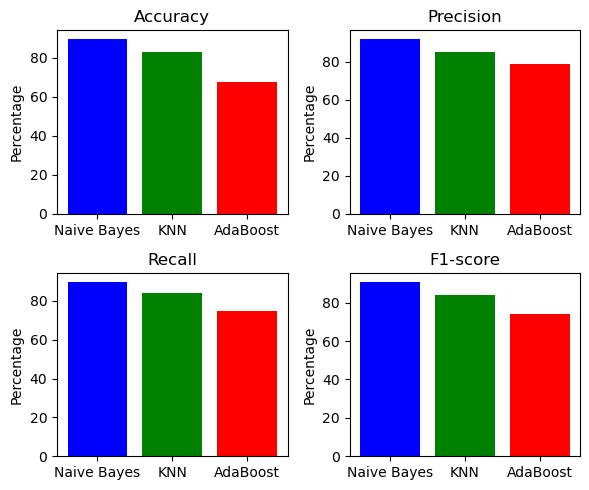

In [18]:
import matplotlib.pyplot as plt

# Define evaluation metrics for all three classifiers
classifiers = ['Naive Bayes', 'KNN', 'AdaBoost']
accuracy = [89.44, 82.84, 67.66]
precision = [92, 85, 79]
recall = [90, 84, 75]
f1_score = [91, 84, 74]

# Plot bar charts
fig, axs = plt.subplots(2, 2, figsize=(6, 5))

# Accuracy
axs[0, 0].bar(classifiers, accuracy, color=['blue', 'green', 'red'])
axs[0, 0].set_title('Accuracy')
axs[0, 0].set_ylabel('Percentage')

# Precision
axs[0, 1].bar(classifiers, precision, color=['blue', 'green', 'red'])
axs[0, 1].set_title('Precision')
axs[0, 1].set_ylabel('Percentage')

# Recall
axs[1, 0].bar(classifiers, recall, color=['blue', 'green', 'red'])
axs[1, 0].set_title('Recall')
axs[1, 0].set_ylabel('Percentage')

# F1-score
axs[1, 1].bar(classifiers, f1_score, color=['blue', 'green', 'red'])
axs[1, 1].set_title('F1-score')
axs[1, 1].set_ylabel('Percentage')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

